In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from allensdk.api.queries.ontologies_api import OntologiesApi
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from matplotlib import cm
import operator

sns.set_context('poster')
sns.set_style('white')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
path = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2018 Plaque'

In [3]:
dat = pd.read_csv(os.path.join(path, 'unionizes', 'experiment_structure_unionizes_consolidated_06_10_2018.csv'))

In [4]:
dat.head()

Unnamed: 0  image_series_id  structure_id  structure_volume  plaque_density
0           1        475882459             1          0.059386             0.0
1           2        475882459             2          0.062983             0.0
2           4        475882459             4          2.450408             0.0
3           6        475882459             6          1.156127             0.0
4           8        475882459             7          0.609720             0.0

In [5]:
meta = pd.read_csv(os.path.join(path, 'T503 animal tracking sheet.csv'))

In [6]:
meta.head(1)

Experiment        Workflow Birth Date Surgery Date Date range  \
0  APP/PS1 age pilot  T503.3 control  4/10/2014    1/23/2015        NaN   

     Surgeon  Specimen ID  Donor / Labtracks ID sex  Age at inj     ...       \
0  Phil Bohn  BL/6-143659              143659.0   F       288.0     ...        

  % secondary source Source DMN fraction Actual Primary Target  \
0                NaN                 NaN                   NaN   

  Actual Secondary Target Informatics targets Target % DMN  \
0                     NaN                 NaN          NaN   

                                          Notes (JW)         Notes (JH)  \
0  Perfect targeting. Large injection: just use d...  injection overlap   

   Repeat status  Unnamed: 73  
0            NaN          NaN  

[1 rows x 74 columns]

In [7]:
meta.keys()

Index([u'Experiment', u'Workflow', u'Birth Date', u'Surgery Date',
       u'Date range', u'Surgeon', u'Specimen ID', u'Donor / Labtracks ID',
       u'sex', u'Age at inj', u'Dataset', u'Genotype', u'JAX birth cage',
       u'Behavioral testing', u'Behavior Tests', u'Behavior group',
       u'Behavior date', u'Project Code', u'IACUC protocol',
       u'# of injections (1-2)', u'Source Area (Inj. 1)', u'AP', u'ML ',
       u'DV ', u'Angle ', u'Injection Material', u'Batch', u'Method',
       u'Target Area (Inj. 2)', u'AP-2', u'ML-2', u'DV-2', u'Angle-2',
       u'Injection Materials', u'Batch2', u'Method2', u'Notes FOR Surgeons',
       u'Notes FROM Surgeons', u'Methoxy-XO4', u'CSF collection',
       u'Methoxy entered in LIMS', u'Days Post Injection', u'task?',
       u'Perfusion Date', u'Imaging Date', u'TC prioritization',
       u'Specimen location', u'Link to images in LIMS', u'TC #',
       u'# GFP cells', u'AAV damage', u'# red sections', u'CAV damage',
       u'TC call (TC fail =

In [8]:
meta['Plaque map call (R hemisphere?)'].unique()

array([nan, 'Fail', 'Pass', 'Pass no CB', 'Pass R side only'],
      dtype=object)

In [9]:
dataset = meta[meta['Plaque map call (R hemisphere?)'].isin(['Pass', 'Pass no CB', 'Pass R side only'])]

In [10]:
len(dataset)

176

In [11]:
oapi = OntologiesApi()
summary_structures = oapi.get_structures(structure_set_names="'Mouse Connectivity - Summary'")
summary_structure_ids = [item['id'] for item in summary_structures]
summary_structure_ids.remove(934)
print(len(summary_structure_ids))

292


In [12]:
coarse_structures = oapi.get_structures(structure_set_names="'Mouse - Coarse'")
coarse_structure_ids = [item['id'] for item in coarse_structures]
print(len(coarse_structure_ids))

12


In [13]:
mcc = MouseConnectivityCache(manifest_file = '../connectivity/mouse_connectivity_manifest.json')
structure_tree = mcc.get_structure_tree()
ia_map = structure_tree.get_id_acronym_map()
ai_map = {value:key for key, value in ia_map.iteritems()}

In [14]:
ai_map[997]

u'root'

In [15]:
structures = summary_structure_ids + coarse_structure_ids + [997]

In [16]:
dataset_ids = dat['image_series_id'].unique()
print(len(dataset_ids))

132


In [17]:
isids = [int(value) for value in dataset['Link to images in LIMS']]

In [18]:
dataset['image_series_id'] = isids

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
dataset = dataset[dataset['image_series_id'].isin(dataset_ids)]
dataset = dataset[~dataset['image_series_id'].isin([525406368, 549363956])]
print(len(dataset))

128


In [21]:
dataset.keys()

Index([u'Experiment', u'Workflow', u'Birth Date', u'Surgery Date',
       u'Date range', u'Surgeon', u'Specimen ID', u'Donor / Labtracks ID',
       u'sex', u'Age at inj', u'Dataset', u'Genotype', u'JAX birth cage',
       u'Behavioral testing', u'Behavior Tests', u'Behavior group',
       u'Behavior date', u'Project Code', u'IACUC protocol',
       u'# of injections (1-2)', u'Source Area (Inj. 1)', u'AP', u'ML ',
       u'DV ', u'Angle ', u'Injection Material', u'Batch', u'Method',
       u'Target Area (Inj. 2)', u'AP-2', u'ML-2', u'DV-2', u'Angle-2',
       u'Injection Materials', u'Batch2', u'Method2', u'Notes FOR Surgeons',
       u'Notes FROM Surgeons', u'Methoxy-XO4', u'CSF collection',
       u'Methoxy entered in LIMS', u'Days Post Injection', u'task?',
       u'Perfusion Date', u'Imaging Date', u'TC prioritization',
       u'Specimen location', u'Link to images in LIMS', u'TC #',
       u'# GFP cells', u'AAV damage', u'# red sections', u'CAV damage',
       u'TC call (TC fail =

In [22]:
dataset.Experiment.unique()

array(['APP/PS1 age pilot', 'J20 age pilot', 'APP/PS1 production',
       'Filter Pilot', 'Tg2576 age pilot',
       'Aim 3 low wavelength imaging pilot', 'Filter PIlot',
       'APP/PS1 cre crosses', 'APP/PS1/rTg4510 pilot'], dtype=object)

In [23]:
dataset.loc[dataset['Specimen ID'].str.contains('APP/PS1'), 'Mouse Line'] = 'APP/PS1'
dataset.loc[dataset['Specimen ID'].str.contains('APP_PS1'), 'Mouse Line'] = 'APP/PS1'
dataset.loc[dataset['Specimen ID'].str.contains('J20'), 'Mouse Line'] = 'J20'
dataset.loc[dataset['Specimen ID'].str.contains('Tg2576'), 'Mouse Line'] = 'Tg2576'
dataset.loc[dataset['Specimen ID'].str.contains('rTg4510'), 'Mouse Line'] = 'APP/PS1/rTg4510'
dataset.loc[dataset['Specimen ID'].str.contains('Cre'), 'Mouse Line'] = 'APP/PS1/Cre'

In [24]:
dataset[dataset['Mouse Line'].isnull()]['Specimen ID']

Series([], Name: Specimen ID, dtype: object)

In [25]:
dataset['Mouse Line'].unique()

array(['APP/PS1', 'J20', 'Tg2576', 'APP/PS1/Cre', 'APP/PS1/rTg4510'],
      dtype=object)

In [26]:
dataset[dataset['Mouse Line'] == 'Tg2576']['Dataset']

188     9 mo
189     9 mo
190     9 mo
226    12 mo
227    12 mo
228    12 mo
229    12 mo
231    12 mo
232    12 mo
349    18 mo
362    18 mo
363    18 mo
364    18 mo
365    18 mo
Name: Dataset, dtype: object

In [27]:
dat.head()

Unnamed: 0  image_series_id  structure_id  structure_volume  plaque_density
0           1        475882459             1          0.059386             0.0
1           2        475882459             2          0.062983             0.0
2           4        475882459             4          2.450408             0.0
3           6        475882459             6          1.156127             0.0
4           8        475882459             7          0.609720             0.0

In [28]:
structure_id = 997
isid = 475882459
dat[(dat['structure_id'] == structure_id) & (dat['image_series_id'] == isid)]

Unnamed: 0  image_series_id  structure_id  structure_volume  \
649        1191        475882459           997        277.092404   

     plaque_density  
649        0.000159

In [29]:
def get_structure_data(age, structure):
    structure_id = ia_map[structure]
    groups = []
    projection_volume = []
    for group in dataset[dataset['Dataset'] == age]['Mouse Line'].unique():
        isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
        for isid in isids:
            groups.append(group)
            projection_volume.append(dat[(dat['structure_id'] == structure_id) & 
                                         (dat['image_series_id'] == isid)]
                                     ['plaque_density'].values[0])
    structuredat = pd.DataFrame({'age': age, 'structure': structure, 
                                 'group': groups, 'projection volume': projection_volume})
    return structuredat

In [30]:
def get_mean_structure_data(age, structure):
    structure_id = ia_map[structure]
    groups = []
    n = []
    means = []
    stds = []
    for group in dataset[dataset['Dataset'] == age]['Mouse Line'].unique():
        groups.append(group)
        isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
        n.append(len(isids))
        means.append(np.mean(dat[(dat['structure_id'] == structure_id) & 
                             (dat['image_series_id'].isin(isids))]
                        ['plaque_density']))
        stds.append(np.std(dat[(dat['structure_id'] == structure_id) & 
                             (dat['image_series_id'].isin(isids))]
                        ['plaque_density']))
    structuredat = pd.DataFrame({'age': age, 'group': groups, 'n':n, 
                                 'structure': structure, 'mean':means, 'standard deviation':stds})
    return structuredat

In [31]:
def get_relative_structure_data(age, structure):
    structure_id = ia_map[structure]
    groups = []
    projection_volume = []
    for group in dataset[dataset['Dataset'] == age]['Mouse Line'].unique():
        isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
        for isid in isids:
            groups.append(group)
            structure_projection_volume = dat[(dat['structure_id'] == structure_id) & 
                                         (dat['image_series_id'] == isid)]['plaque_density'].values[0]
            total_volume = dat[(dat['structure_id'] == 997) & # relative to root
                               (dat['image_series_id'] == isid)]['plaque_density'].values[0]
            projection_volume.append(structure_projection_volume/total_volume)
    structuredat = pd.DataFrame({'age': age, 'structure': structure, 
                                 'group': groups, 'projection volume': projection_volume})
    return structuredat

In [32]:
pltdat = get_mean_structure_data('12 mo', 'HPF')
pd.concat([pltdat, get_mean_structure_data('12 mo', 'Isocortex')])

age            group      mean   n  standard deviation  structure
0  12 mo          APP/PS1  0.009370  30            0.004847        HPF
1  12 mo           Tg2576  0.000201   6            0.000062        HPF
2  12 mo      APP/PS1/Cre  0.005719   5            0.001335        HPF
3  12 mo              J20  0.000824   8            0.000144        HPF
4  12 mo  APP/PS1/rTg4510  0.007647   6            0.004761        HPF
0  12 mo          APP/PS1  0.012912  30            0.007255  Isocortex
1  12 mo           Tg2576  0.000210   6            0.000066  Isocortex
2  12 mo      APP/PS1/Cre  0.008005   5            0.002155  Isocortex
3  12 mo              J20  0.000213   8            0.000043  Isocortex
4  12 mo  APP/PS1/rTg4510  0.010272   6            0.004859  Isocortex

In [33]:
meandat = pd.DataFrame(columns={'age', 'group', 'mean', 'n', 'standard deviation', 'structure'})
for age in dataset['Dataset'].unique():
    for structure in structures:
        meandat = pd.concat([meandat, get_mean_structure_data(age, ai_map[structure])])

In [34]:
meandat.to_csv(os.path.join(path, 'mean and standard deviation by mouse line and structure.csv'))

In [35]:
pltdat = get_structure_data('12 mo', 'root')

In [36]:
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'plaque density')

In [37]:
mdf

age structure            group           variable  plaque density
0   12 mo      root          APP/PS1  projection volume        0.006910
1   12 mo      root          APP/PS1  projection volume        0.005865
2   12 mo      root          APP/PS1  projection volume        0.005392
3   12 mo      root          APP/PS1  projection volume        0.004740
4   12 mo      root          APP/PS1  projection volume        0.005067
5   12 mo      root          APP/PS1  projection volume        0.010129
6   12 mo      root          APP/PS1  projection volume        0.004675
7   12 mo      root          APP/PS1  projection volume        0.003685
8   12 mo      root          APP/PS1  projection volume        0.008723
9   12 mo      root          APP/PS1  projection volume        0.008287
10  12 mo      root          APP/PS1  projection volume        0.005757
11  12 mo      root          APP/PS1  projection volume        0.010136
12  12 mo      root          APP/PS1  projection volume        0.003443
13  12 mo      root          APP/PS1  projection volume        0.009663
14  12 mo      root          APP/PS1  projection volume        0.003648
15  12 mo      root          APP/PS1  projection volume        0.009466
16  12 mo      root          APP/PS1  projection volume        0.007972
17  12 mo      root          APP/PS1  projection volume        0.011876
18  12 mo      root          APP/PS1  projection volume        0.002602
19  12 mo      root          APP/PS1  projection volume        0.003156
20  12 mo      root          APP/PS1  projection volume        0.005249
21  12 mo      root          APP/PS1  projection volume        0.004151
22  12 mo      root          APP/PS1  projection volume        0.001769
23  12 mo      root          APP/PS1  projection volume        0.003529
24  12 mo      root          APP/PS1  projection volume        0.002081
25  12 mo      root          APP/PS1  projection volume        0.001963
26  12 mo      root          APP/PS1  projection volume        0.003081
27  12 mo      root          APP/PS1  projection volume        0.001411
28  12 mo      root          APP/PS1  projection volume        0.004056
29  12 mo      root          APP/PS1  projection volume        0.006035
30  12 mo      root           Tg2576  projection volume        0.000227
31  12 mo      root           Tg2576  projection volume        0.000149
32  12 mo      root           Tg2576  projection volume        0.000227
33  12 mo      root           Tg2576  projection volume        0.000273
34  12 mo      root           Tg2576  projection volume        0.000216
35  12 mo      root           Tg2576  projection volume        0.000205
36  12 mo      root      APP/PS1/Cre  projection volume        0.003929
37  12 mo      root      APP/PS1/Cre  projection volume        0.003551
38  12 mo      root      APP/PS1/Cre  projection volume        0.001869
39  12 mo      root      APP/PS1/Cre  projection volume        0.004027
40  12 mo      root      APP/PS1/Cre  projection volume        0.004102
41  12 mo      root              J20  projection volume        0.000153
42  12 mo      root              J20  projection volume        0.000260
43  12 mo      root              J20  projection volume        0.000263
44  12 mo      root              J20  projection volume        0.000391
45  12 mo      root              J20  projection volume        0.000315
46  12 mo      root              J20  projection volume        0.000354
47  12 mo      root              J20  projection volume        0.000205
48  12 mo      root              J20  projection volume        0.000267
49  12 mo      root  APP/PS1/rTg4510  projection volume        0.008627
50  12 mo      root  APP/PS1/rTg4510  projection volume        0.002500
51  12 mo      root  APP/PS1/rTg4510  projection volume        0.007097
52  12 mo      root  APP/PS1/rTg4510  projection volume        0.004769
53  12 mo      root  APP/PS1/rTg4510  projection volume        0.002638
54  12 mo      root  APP/PS1/rTg4510  projecti

Text(0.5,1,u'Whole Brain Plaque Density at 12 Months')

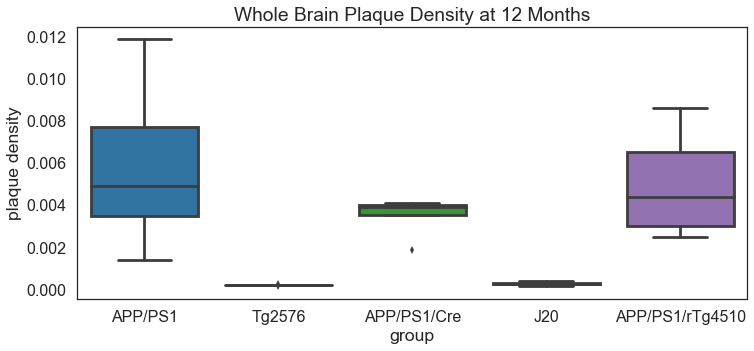

In [38]:
fig, ax = plt.subplots(1, figsize = (12, 5))
sns.boxplot('group', 'plaque density', data=mdf, ax=ax)
plt.title('Whole Brain Plaque Density at 12 Months')

In [39]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for structure in coarse_structure_ids:
    structure_acronym = ai_map[structure]
    pltdat = pd.concat([pltdat, get_structure_data('12 mo', structure_acronym)])
pltdat = pd.concat([pltdat, get_structure_data('12 mo', 'fiber tracts')])
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'plaque density')

In [40]:
mdf.head()

age  structure    group           variable  plaque density
0  12 mo  Isocortex  APP/PS1  projection volume        0.016606
1  12 mo  Isocortex  APP/PS1  projection volume        0.015219
2  12 mo  Isocortex  APP/PS1  projection volume        0.013773
3  12 mo  Isocortex  APP/PS1  projection volume        0.011803
4  12 mo  Isocortex  APP/PS1  projection volume        0.011419

In [41]:
savepath = os.path.join(path, 'figures')

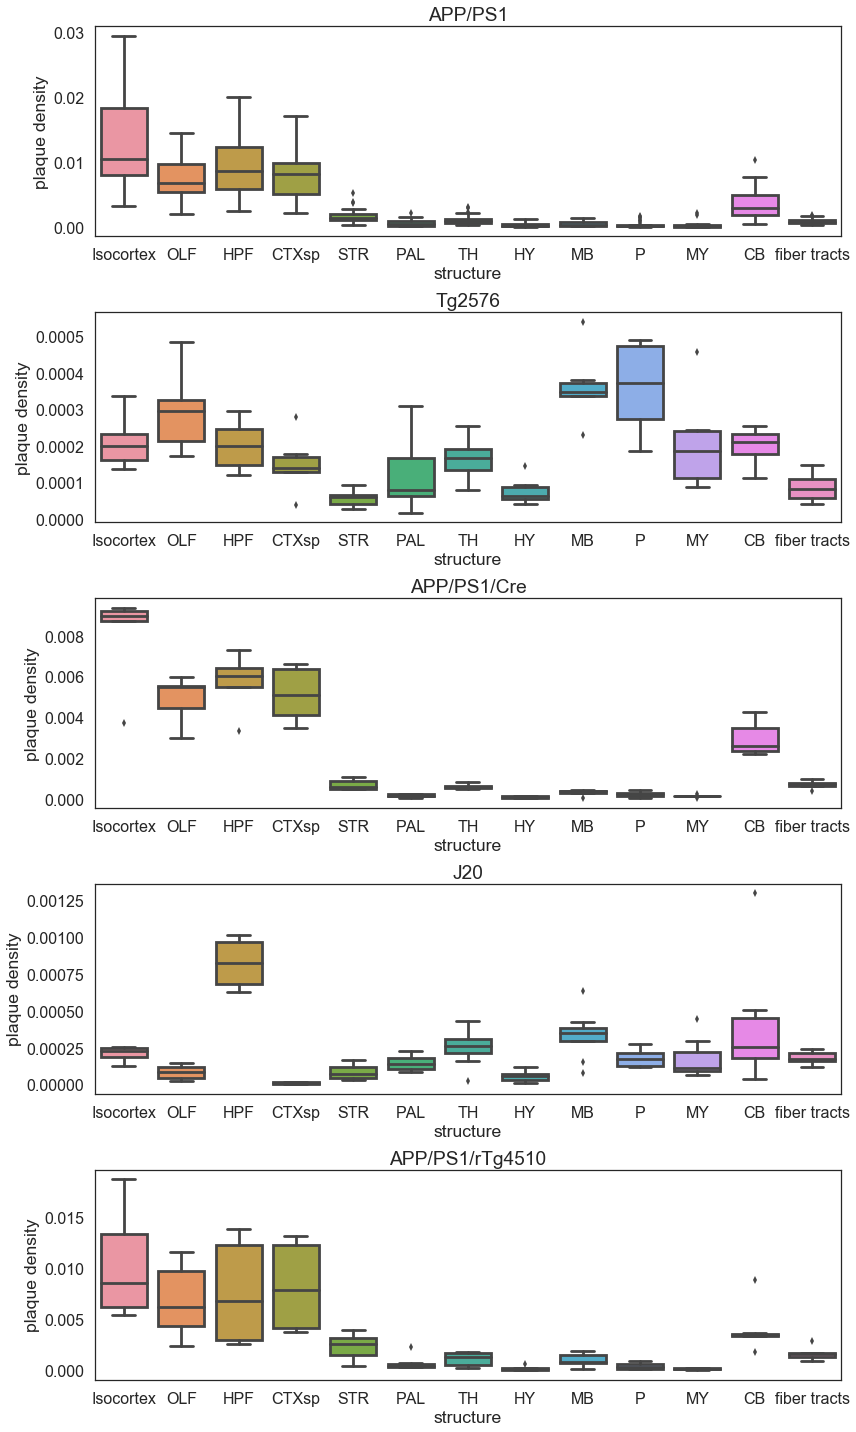

In [42]:
fig, ax = plt.subplots(5, figsize = (12, 20))
for ix in range(5):
    group = mdf['group'].unique()[ix]
    g = sns.boxplot('structure', 'plaque density', data = mdf[mdf['group'] == group], ax=ax[ix])
    g.set_title(group)
    plt.tight_layout()
plt.savefig(os.path.join(path, 'boxplots major brain divisions by line.pdf'), 
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

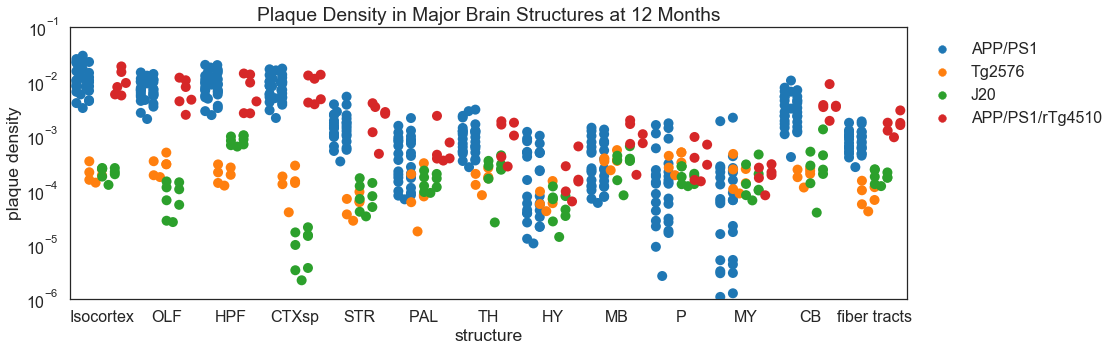

In [43]:
fig, ax=plt.subplots(figsize=(15, 5))
sns.swarmplot('structure', 'plaque density', hue='group', data=mdf[mdf['group'].isin(['APP/PS1', 
                                                                                      'J20',
                                                                                      'Tg2576', 
                                                                                      'APP/PS1/rTg4510'])], 
                                                                                     ax=ax, s=10, dodge=True)
ax.legend(bbox_to_anchor=(1.25, 1))
ax.set_yscale('log')
ax.set_ylim([1e-6, 0.1])
plt.title('Plaque Density in Major Brain Structures at 12 Months')
plt.savefig(os.path.join(path, 'swarmplot plaque density major brain divisions four lines only.pdf'), 
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [44]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for structure in coarse_structure_ids:
    structure_acronym = ai_map[structure]
    pltdat = pd.concat([pltdat, get_relative_structure_data('12 mo', structure_acronym)])
pltdat = pd.concat([pltdat, get_relative_structure_data('12 mo', 'fiber tracts')])
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'relative plaque density')

/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


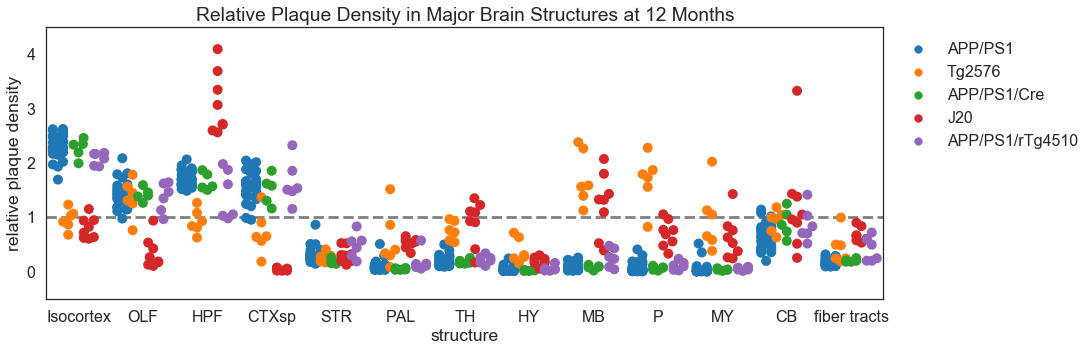

In [45]:
fig, ax=plt.subplots(figsize=(15, 5))
sns.swarmplot('structure', 'relative plaque density', hue='group', data=mdf, ax=ax, s=10, split=True)
ax.legend(bbox_to_anchor=(1.25, 1))
ax.axhline(y=1, xmin=0, xmax=100, color = 'grey', linestyle = 'dashed', zorder = -1)
ax.set_ylim([-0.5, 4.5])
plt.title('Relative Plaque Density in Major Brain Structures at 12 Months')
plt.savefig(os.path.join(path, 'swarmplot relative density major brain divisions.pdf'), 
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [46]:
dataset

Experiment Workflow  Birth Date Surgery Date Date range  \
6        APP/PS1 age pilot   T503.3         NaN     4/1/2015        NaN   
8        APP/PS1 age pilot   T503.3         NaN     4/1/2015        NaN   
9        APP/PS1 age pilot   T503.3         NaN     4/1/2015        NaN   
10       APP/PS1 age pilot   T503.3         NaN     4/1/2015        NaN   
11       APP/PS1 age pilot   T503.3         NaN     4/1/2015        NaN   
15       APP/PS1 age pilot   T503.3         NaN     6/8/2015        NaN   
16       APP/PS1 age pilot   T503.3         NaN     6/8/2015        NaN   
19       APP/PS1 age pilot   T503.3         NaN     6/9/2015        NaN   
20       APP/PS1 age pilot   T503.3         NaN     6/9/2015        NaN   
21       APP/PS1 age pilot   T503.3         NaN     6/9/2015        NaN   
22       APP/PS1 age pilot   T503.3   6/10/2014    6/10/2015        NaN   
23       APP/PS1 age pilot   T503.3         NaN    6/10/2015        NaN   
24       APP/PS1 age pilot   T503.3         NaN    6/10/2015        NaN   
29       APP/PS1 age pilot   T503.3         NaN    6/24/2015        NaN   
42       APP/PS1 age pilot   T503.3         NaN     8/4/2015        NaN   
52       APP/PS1 age pilot   T503.3         NaN    8/12/2015        NaN   
66           J20 age pilot   T503.3         NaN   11/24/2015        NaN   
67       APP/PS1 age pilot   T503.3         NaN   12/16/2015        NaN   
68       APP/PS1 age pilot   T503.3         NaN   12/16/2015        NaN   
69       APP/PS1 age pilot   T503.3         NaN   12/16/2015        NaN   
76       APP/PS1 age pilot   T503.3         NaN     1/7/2016        NaN   
77       APP/PS1 age pilot   T503.3         NaN     1/7/2016        NaN   
78       APP/PS1 age pilot   T503.3         NaN     1/7/2016        NaN   
80       APP/PS1 age pilot   T503.3         NaN    1/13/2016        NaN   
86      APP/PS1 production   T503.3         NaN    1/22/2016        NaN   
88       APP/PS1 age pilot   T503.3         NaN    2/25/2016        NaN   
90           J20 age pilot   T503.3         NaN    2/26/2016        NaN   
92       APP/PS1 age pilot   T503.3   8/29/2015     3/2/2016        NaN   
97       APP/PS1 age pilot   T503.3   2/24/2015    3/30/2016        NaN   
98       APP/PS1 age pilot   T503.3   2/24/2015    3/30/2016        NaN   
..                     ...      ...         ...          ...        ...   
324          J20 age pilot   T503.3  11/15/2016    3/17/2017        NaN   
326          J20 age pilot   T503.3  11/18/2016    3/24/2017        NaN   
327      APP/PS1 age pilot   T503.3   7/22/2016    3/24/2017        NaN   
328      APP/PS1 age pilot   T503.3  11/22/2016    3/24/2017        NaN   
330          J20 age pilot   T503.3   3/21/2016    3/28/2017        NaN   
331          J20 age pilot   T503.3    3/8/2016    3/28/2017        NaN   
333          J20 age pilot   T503.3   3/21/2016    3/29/2017        NaN   
336          J20 age pilot   T503.3   3/21/2016    3/29/2017        NaN   
338     APP/PS1 production   T503.3    4/5/2016     4/6/2017        NaN   
341          J20 age pilot   T503.3   4/13/2016    4/18/2017        NaN   
342          J20 age pilot   T503.3   4/13/2016    4/18/2017        NaN   
344    APP/PS1 cre crosses   T503.3   4/29/2016    4/19/2017        NaN   
349       Tg2576 age pilot   T503.3    1/2/2016    6/14/2017       flex   
360    APP/PS1 cre crosses   T503.3   6/20/2016     7/7/2017      exact   
362       Tg2576 age pilot   T503.3    1/2/2016    7/11/2017       flex   
363       Tg2576 age pilot   T503.3    1/2/2016    7/11/2017       flex   
364       Tg2576 age pilot   T503.3    1/2/2016    7/11/2017       flex   
365       Tg2576 age pilot   T503.3    1/2/2016    7/11/2017       flex   
367          J20 age pilot   T503.3   11/3/2016    8/14/2017       flex   
378      APP/PS1 age pilot   T503.3   7/31/2016     9/1/2017      exact   
381      APP/PS1 age pilot   T503.3   2/25/2016     9/8/2017      exact   
390          J20 age pilot   T503.3    2/

In [48]:
acronym = 'MB'
structure_id = ia_map[acronym]
needs_mask = []
total_image_series = 0
for image_series in dataset[dataset['Mouse Line'].isin(['Tg2576', 'J20'])]['image_series_id']:
    total_image_series += 1
    projection_volume = dat[(dat['structure_id'] == structure_id) & 
                            (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    root_val = dat[(dat['structure_id'] == 997) & 
                   (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    if projection_volume > root_val:
        needs_mask.append(image_series)
print('total image series checked: {0}'.format(total_image_series))
print('needs {0} mask: {1}'.format(acronym, needs_mask))

total image series checked: 44
needs MB mask: [608046247, 609159458, 609474383, 613914647, 614434909, 613281108, 657043416, 657170646, 614736901, 666467289, 648897932, 649182282, 675805553, 676352600, 649481611, 650051836, 682202865]


In [50]:
acronym = 'HY'
structure_id = ia_map[acronym]
needs_mask = []
total_image_series = 0
for image_series in dataset[dataset['Mouse Line'].isin(['Tg2576', 'J20'])]['image_series_id']:
    total_image_series += 1
    projection_volume = dat[(dat['structure_id'] == structure_id) & 
                            (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    root_val = dat[(dat['structure_id'] == 997) & 
                   (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    if projection_volume > root_val:
        needs_mask.append(image_series)
print('total image series checked: {0}'.format(total_image_series))
print('needs {0} mask: {1}'.format(acronym, needs_mask))

total image series checked: 44
needs HY mask: []


In [51]:
acronym = 'P'
structure_id = ia_map[acronym]
needs_mask = []
total_image_series = 0
for image_series in dataset[dataset['Mouse Line'].isin(['Tg2576', 'J20'])]['image_series_id']:
    total_image_series += 1
    projection_volume = dat[(dat['structure_id'] == structure_id) & 
                            (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    root_val = dat[(dat['structure_id'] == 997) & 
                   (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    if projection_volume > root_val:
        needs_mask.append(image_series)
print('total image series checked: {0}'.format(total_image_series))
print('needs {0} mask: {1}'.format(acronym, needs_mask))

total image series checked: 44
needs P mask: [521944208, 608046247, 609159458, 609474383, 613914647, 614434909, 657043416, 657170646, 614736901, 674212069, 648897932, 682202865]


In [52]:
acronym = 'HPF'
structure_id = ia_map[acronym]
needs_mask = []
total_image_series = 0
for image_series in dataset[dataset['Mouse Line'].isin(['Tg2576', 'J20'])]['image_series_id']:
    total_image_series += 1
    projection_volume = dat[(dat['structure_id'] == structure_id) & 
                            (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    root_val = dat[(dat['structure_id'] == 997) & 
                   (dat['image_series_id'] == image_series)]['plaque_density'].values[0]
    if projection_volume > root_val:
        needs_mask.append(image_series)
print('total image series checked: {0}'.format(total_image_series))
print('needs {0} mask: {1}'.format(acronym, needs_mask))

total image series checked: 44
needs HPF mask: [504636326, 510387647, 526189909, 521944208, 522101953, 549200261, 550893207, 665213998, 576685911, 559188893, 657043416, 614736901, 666093575, 666467289, 666468011, 673384641, 674212069, 668744186, 648897932, 675317179, 649182282, 649364814, 675805553, 676352600, 649481611, 650051836, 603467469, 609865610, 676824521, 678009833, 678595241, 682202865]


In [53]:
olf = structure_tree.get_structures_by_acronym(['OLF'])[0]
olf = structure_tree.descendant_ids([olf['id']])[0]
olf = [structure for structure in olf if structure in summary_structure_ids]

In [54]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for structure in olf:
    structure_acronym = ai_map[structure]
    pltdat = pd.concat([pltdat, get_structure_data('12 mo', structure_acronym)])

In [55]:
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'plaque density')

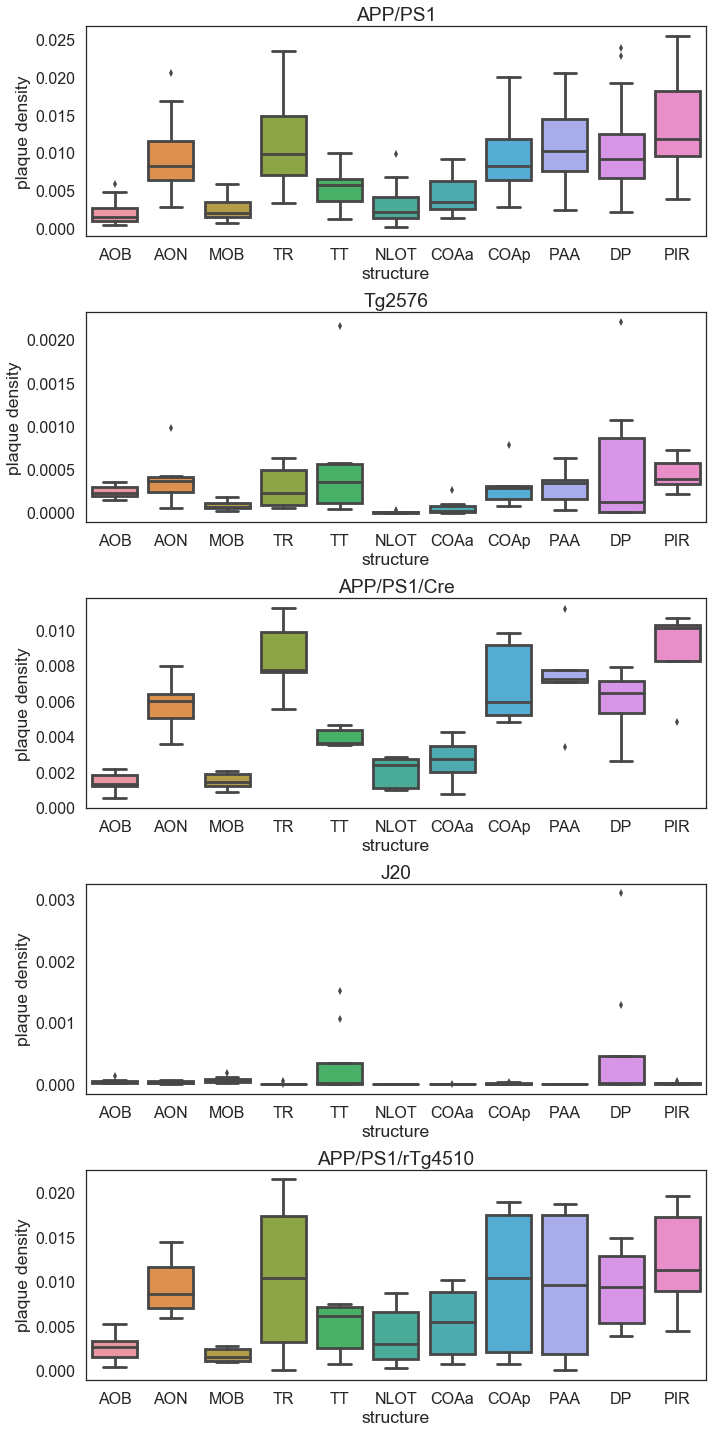

In [56]:
fig, ax = plt.subplots(5, figsize = (10, 20))
for ix in range(5):
    group = mdf['group'].unique()[ix]
    g = sns.boxplot('structure', 'plaque density', data = mdf[mdf['group'] == group], ax=ax[ix])
    g.set_title(group)
    plt.tight_layout()
#plt.savefig(os.path.join(path, 'boxplots major brain divisions by line.pdf'), 
#            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [57]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for age in dataset['Dataset'].unique():
    for structure in coarse_structure_ids:
        structure_acronym = ai_map[structure]
        pltdat = pd.concat([pltdat, get_structure_data(age, structure_acronym)])

In [58]:
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'plaque density')

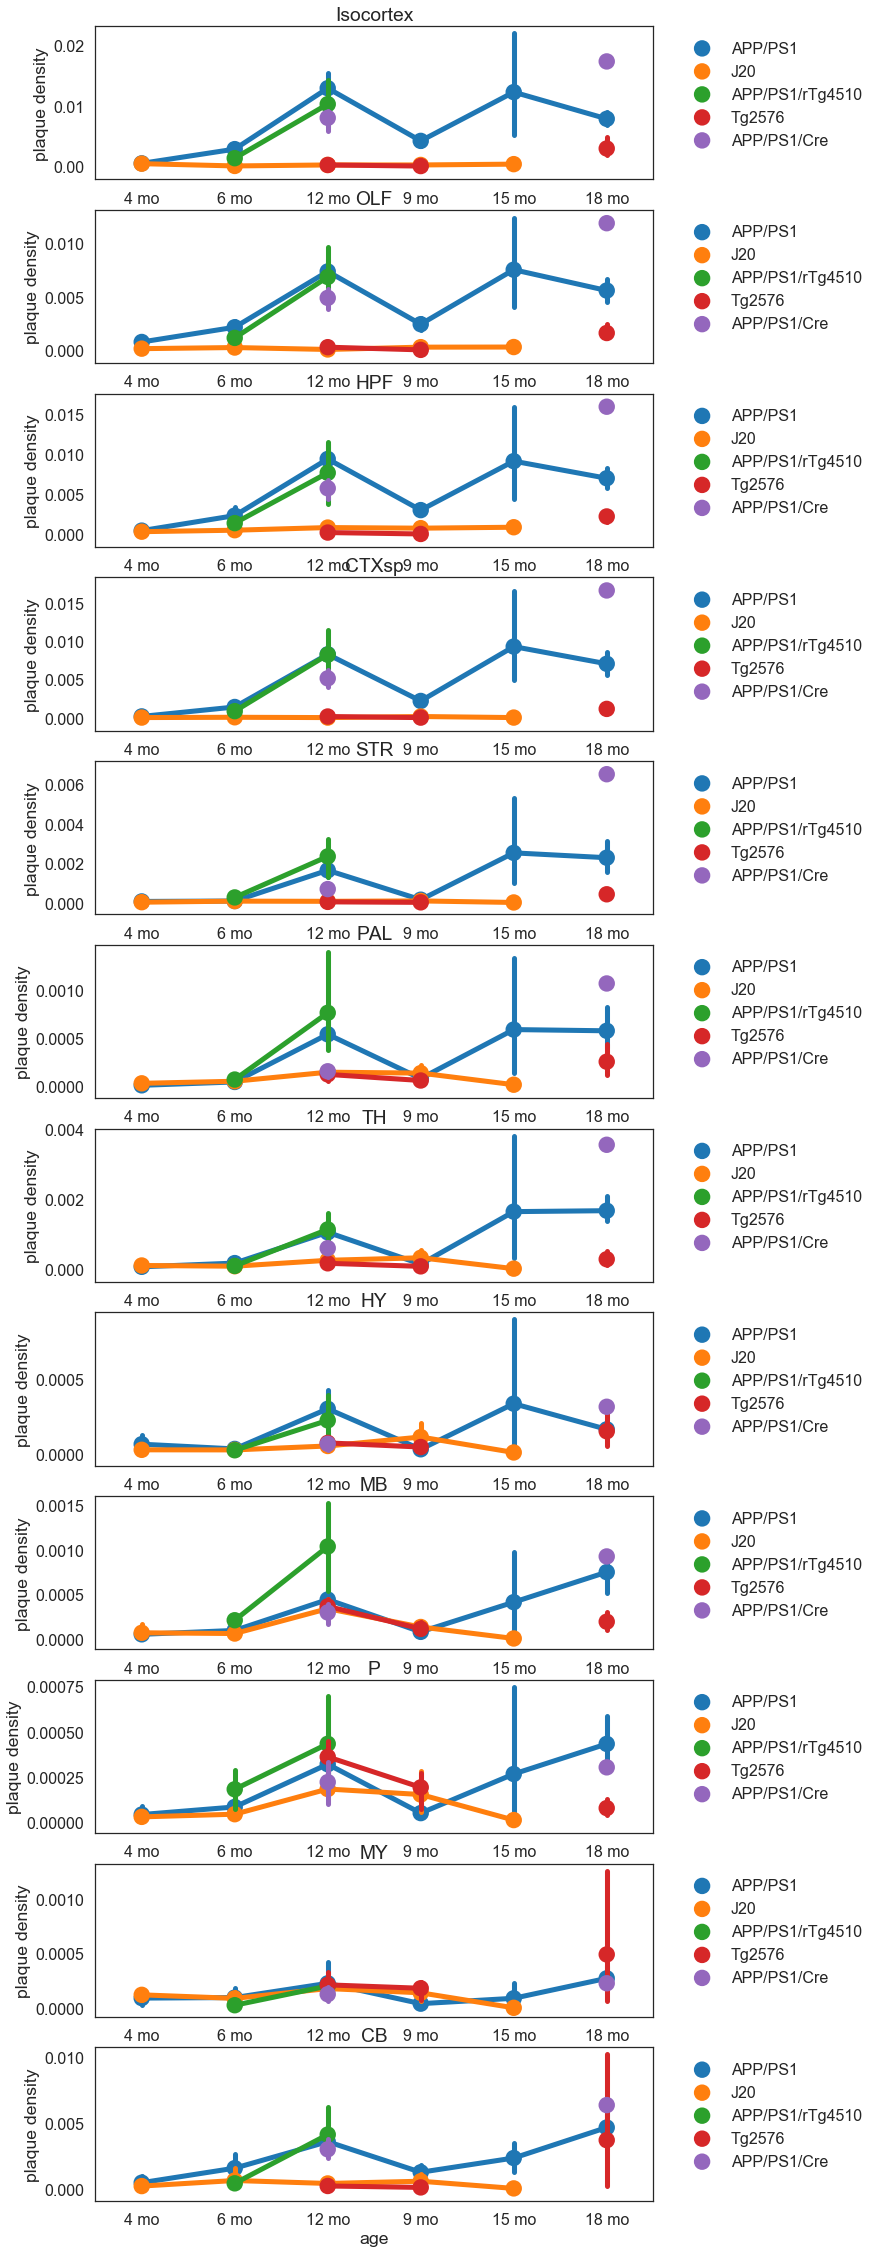

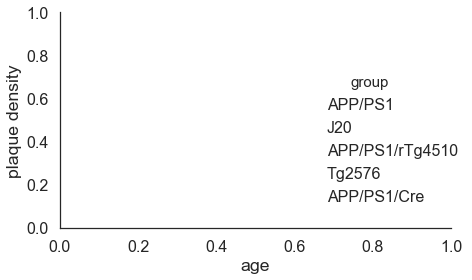

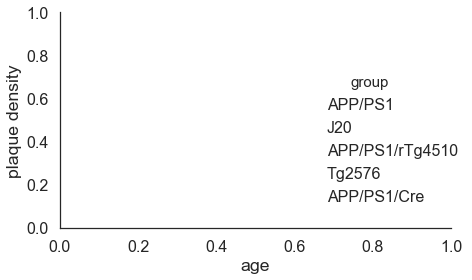

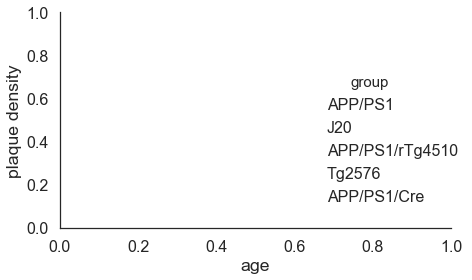

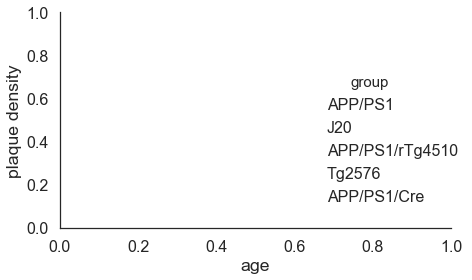

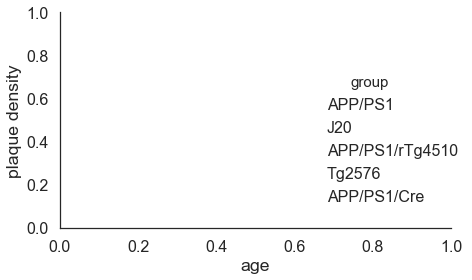

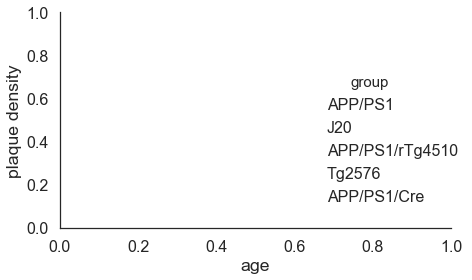

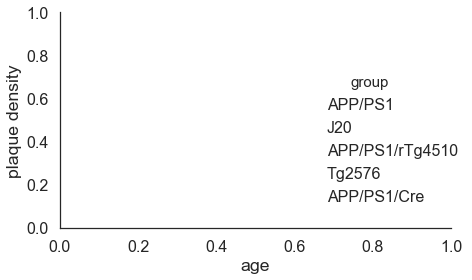

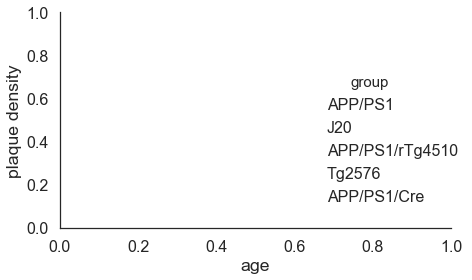

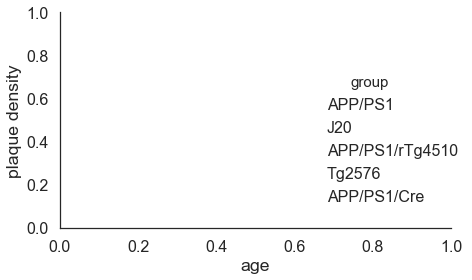

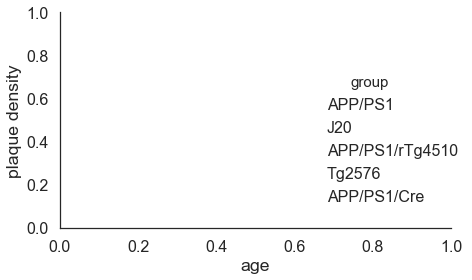

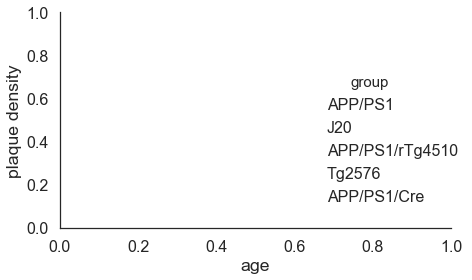

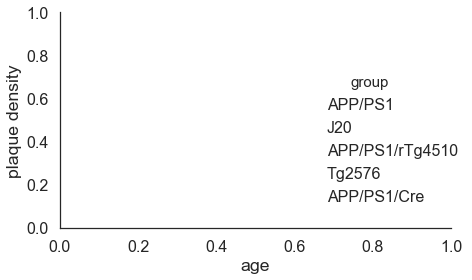

In [59]:
fig, ax = plt.subplots(12, figsize = (10, 40))
for ix in range(12):
    structure = ai_map[coarse_structure_ids[ix]]
    sns.factorplot('age', 'plaque density', hue='group', data=mdf[mdf['structure'] == structure], ax=ax[ix])
    ax[ix].set_title(structure)
    ax[ix].legend(bbox_to_anchor=(1.4, 1))
    plt.tight_layout()

In [110]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for age in dataset['Dataset'].unique():
    for structure in coarse_structure_ids:
        structure_acronym = ai_map[structure]
        pltdat = pd.concat([pltdat, get_relative_structure_data(age, structure_acronym)])

In [111]:
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'relative plaque density')

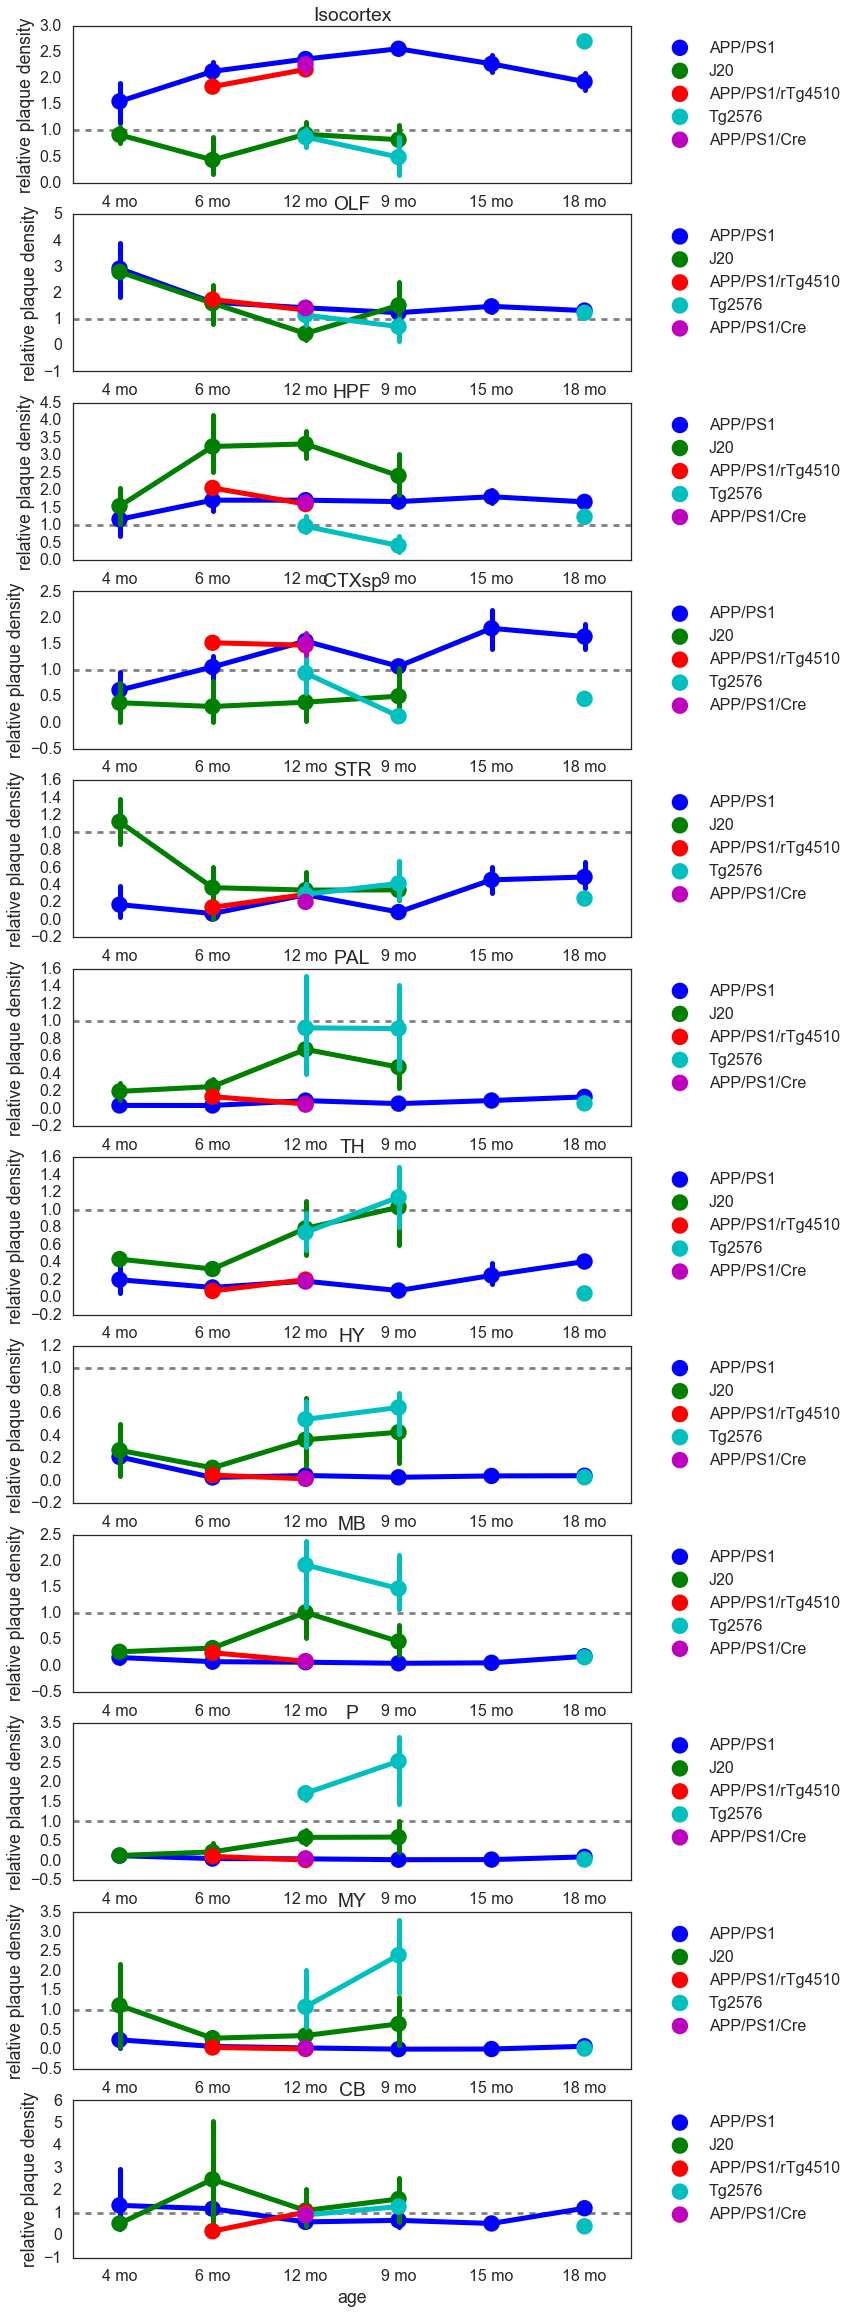

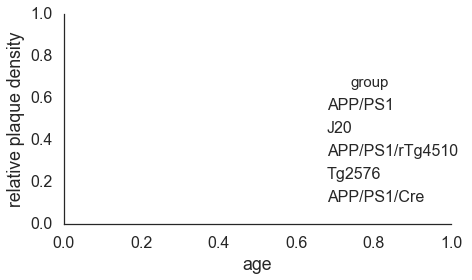

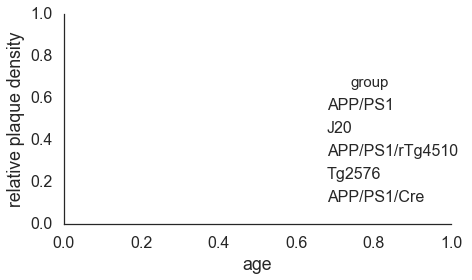

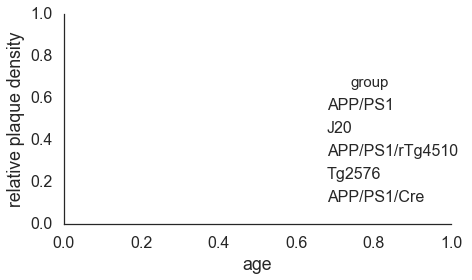

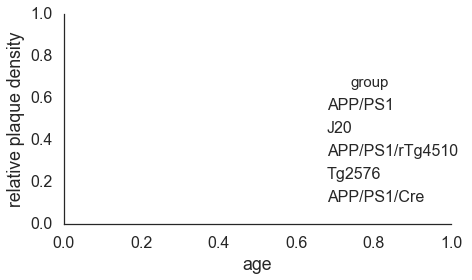

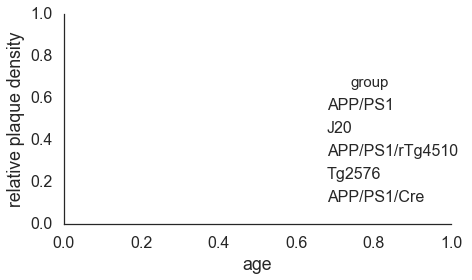

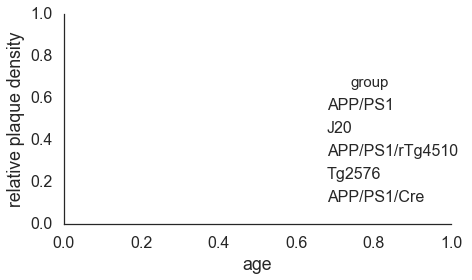

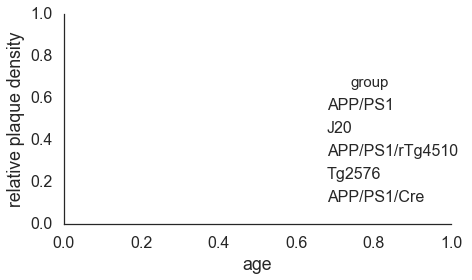

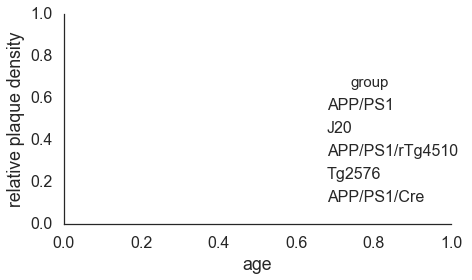

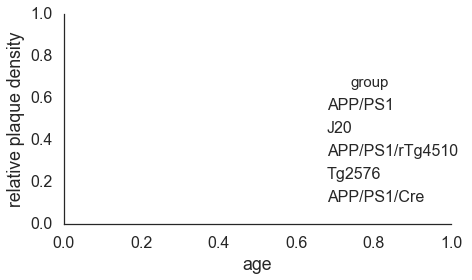

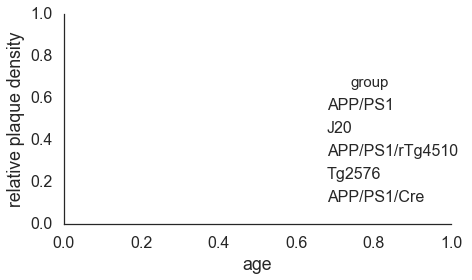

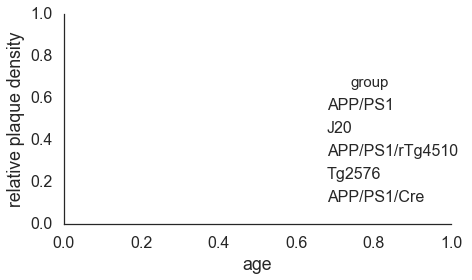

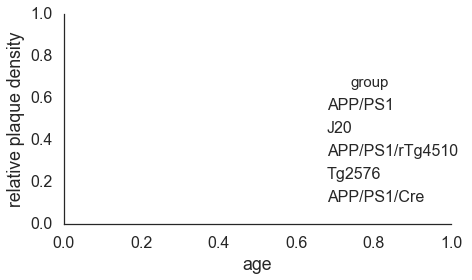

In [112]:
fig, ax = plt.subplots(12, figsize = (10, 40))
for ix in range(12):
    structure = ai_map[coarse_structure_ids[ix]]
    sns.factorplot('age', 'relative plaque density', hue='group', data=mdf[mdf['structure'] == structure], ax=ax[ix])
    ax[ix].set_title(structure)
    ax[ix].legend(bbox_to_anchor=(1.4, 1))
    ax[ix].axhline(y=1, xmin=0, xmax=100, color = 'grey', linestyle = 'dashed', zorder = -1)
    plt.tight_layout()

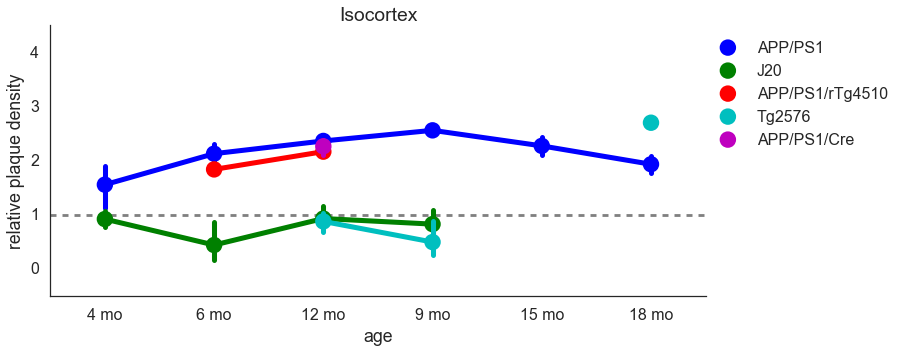

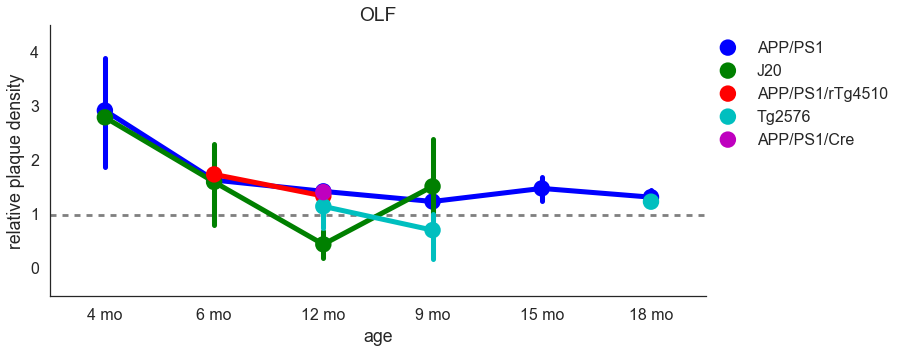

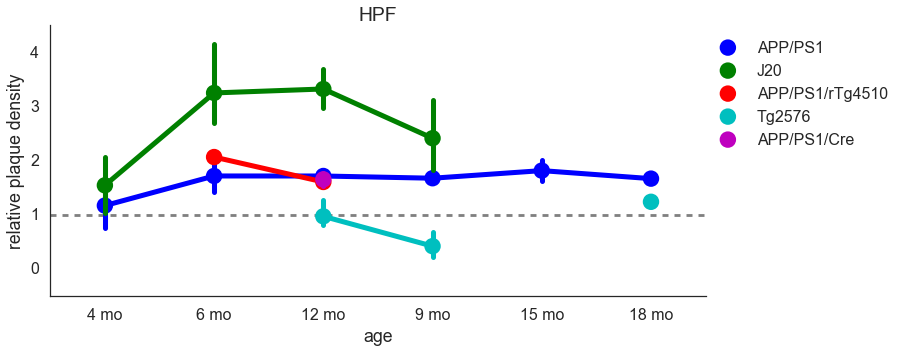

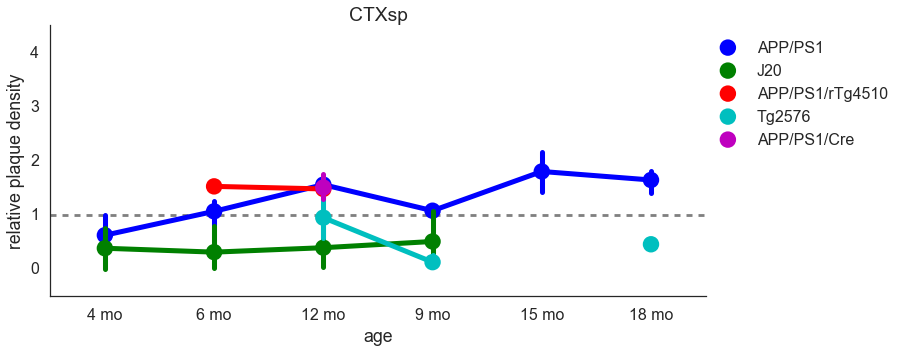

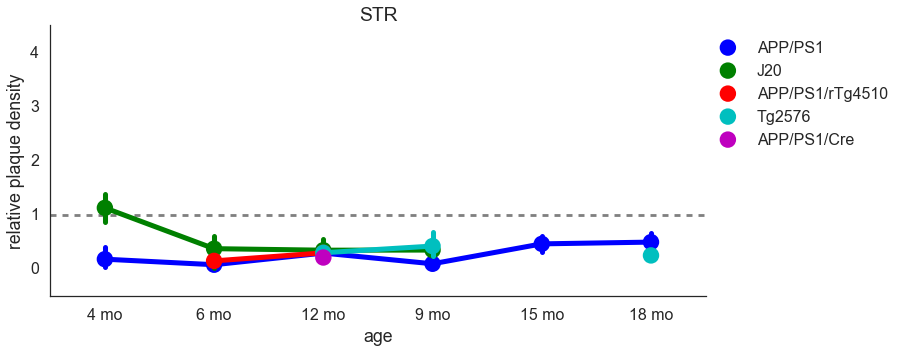

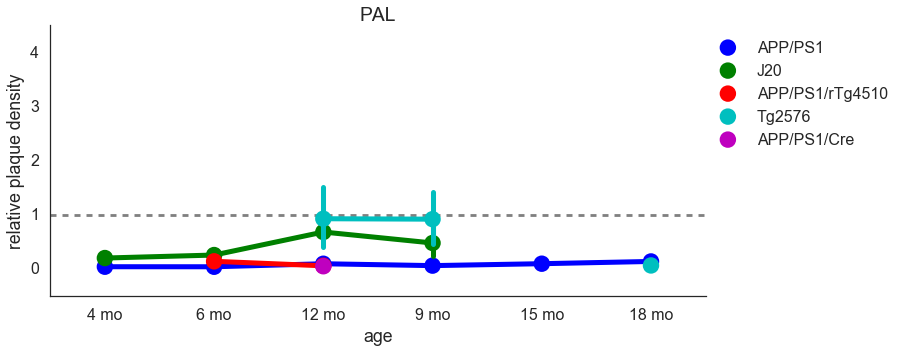

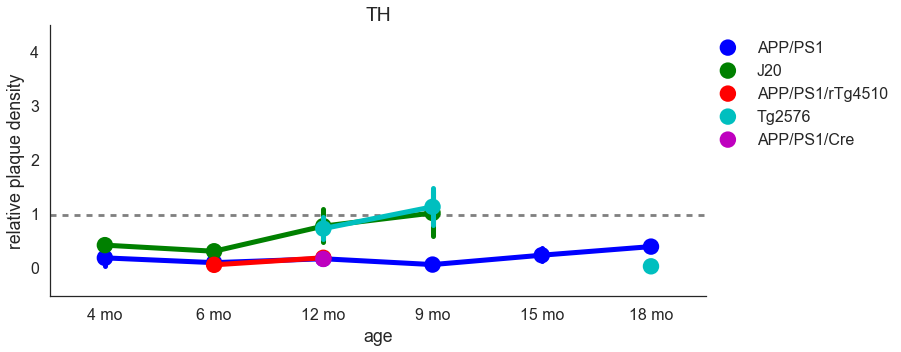

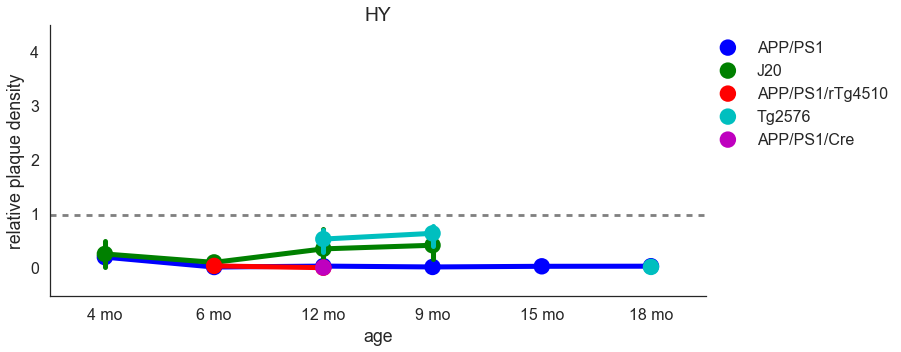

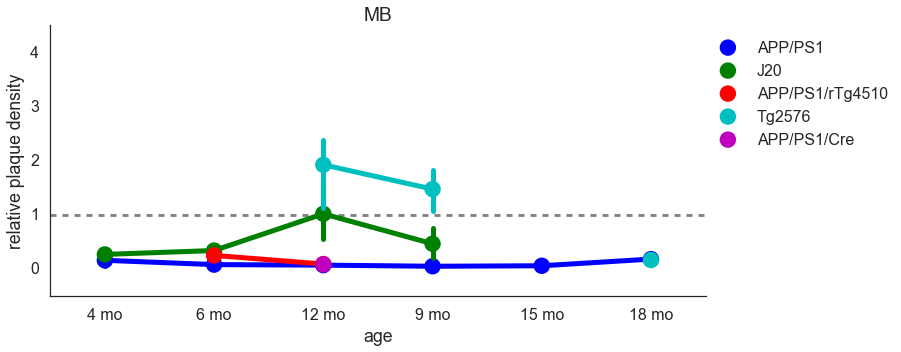

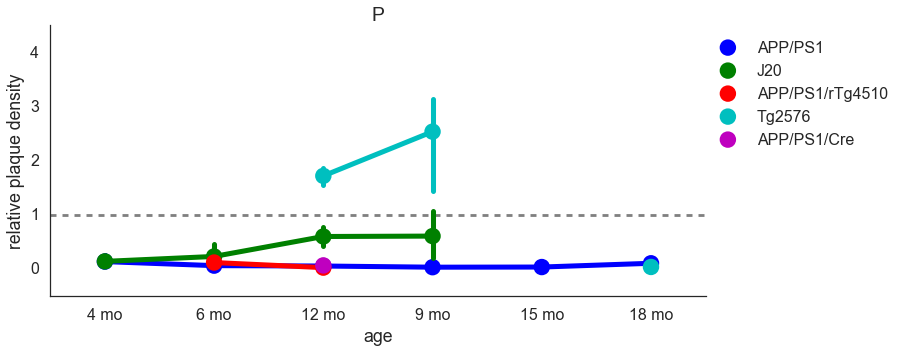

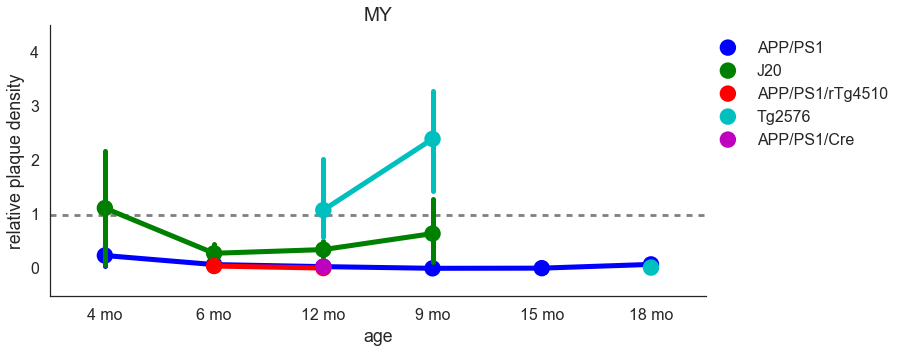

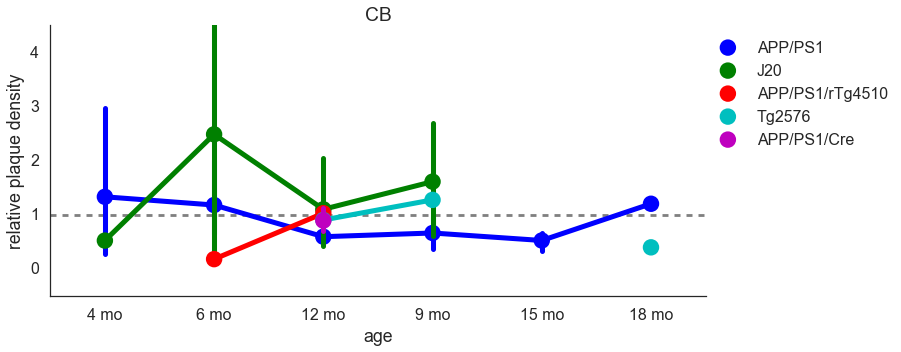

In [113]:
for ix in range(12):
    structure = ai_map[coarse_structure_ids[ix]]
    a = sns.factorplot('age', 'relative plaque density', hue='group', data=mdf[mdf['structure'] == structure],
                      legend=False, size=5, aspect=2, fontsize=10)
    a.ax.set_title(structure)
    a.ax.legend(bbox_to_anchor=(1.3, 1))
    a.ax.set_ylim([-0.5, 4.5])
    a.ax.axhline(y=1, xmin=0, xmax=100, color = 'grey', linestyle = 'dashed', zorder = -1)
    plt.tight_layout()
    plt.savefig(os.path.join(path, 'relative plaque density {0}.pdf'.format(structure)), 
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [60]:
iso = structure_tree.get_structures_by_acronym(['Isocortex'])[0]
hipp = structure_tree.get_structures_by_acronym(['HPF'])[0]
ptlp = structure_tree.get_structures_by_acronym(['PTLp'])[0]
isohipp_ids = structure_tree.descendant_ids([iso['id'], hipp['id'], ptlp['id']])
print(len(isohipp_ids))
isohipp_ids = [y for x in isohipp_ids for y in x]
print(len(isohipp_ids))

3
496


In [61]:
isohipp_ids = [ids for ids in isohipp_ids if ids in summary_structure_ids]
print(len(isohipp_ids))

57


In [64]:
def get_relative_structure_data_ctx(age, structure):
    structure_id = ia_map[structure]
    groups = []
    projection_volume = []
    for group in dataset[dataset['Dataset'] == age]['Mouse Line'].unique():
        isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
        for isid in isids:
            groups.append(group)
            structure_projection_volume = dat[(dat['structure_id'] == structure_id) & 
                                         (dat['image_series_id'] == isid)]['plaque_density'].values[0]
            iso_volume = dat[(dat['structure_id'] == 315) & # isocortex
                               (dat['image_series_id'] == isid)]['plaque_density'].values[0]
            hpf_volume = dat[(dat['structure_id'] == 1089) & # hippocampal formation
                               (dat['image_series_id'] == isid)]['plaque_density'].values[0]
            total_volume = iso_volume+hpf_volume
            projection_volume.append(structure_projection_volume/total_volume)
    structuredat = pd.DataFrame({'age': age, 'structure': structure, 
                                 'group': groups, 'projection volume': projection_volume})
    return structuredat

In [65]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for structure in isohipp_ids:
    structure_acronym = ai_map[structure]
    pltdat = pd.concat([pltdat, get_relative_structure_data_ctx('12 mo', structure_acronym)])
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'relative plaque density')

(-0.5, 4)

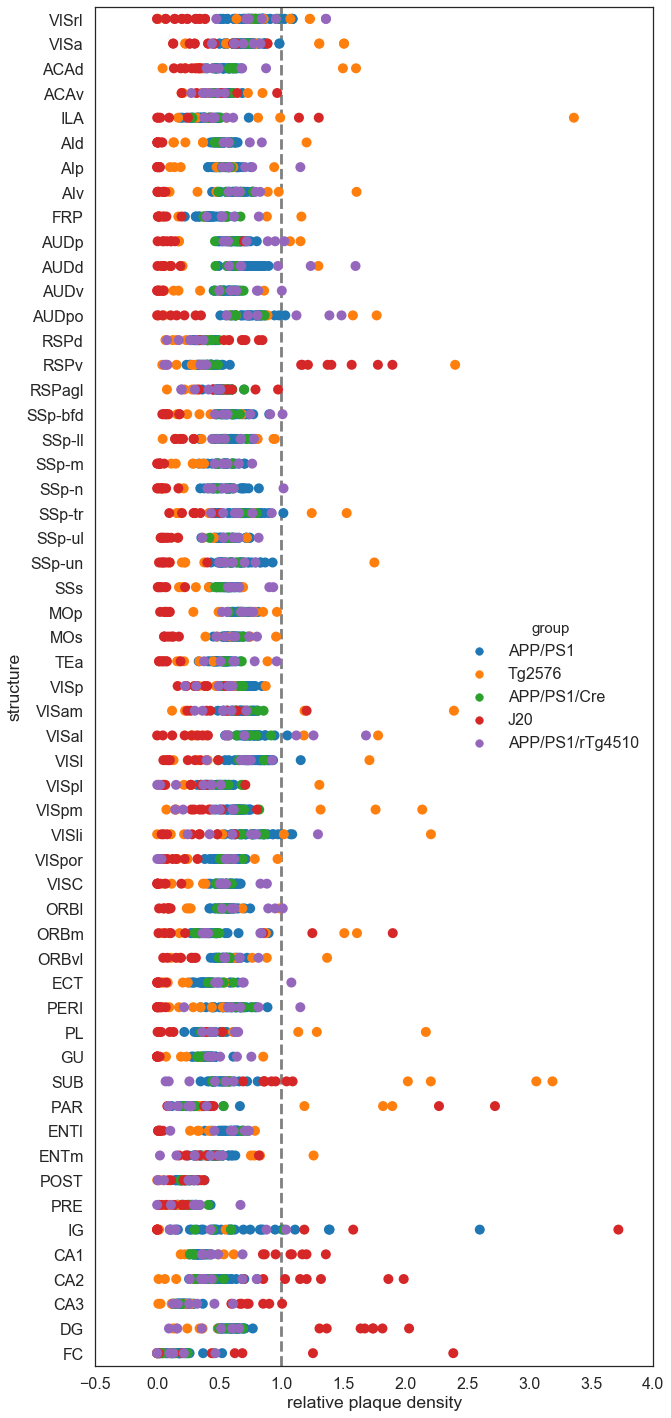

In [66]:
fig, ax=plt.subplots(figsize=(10, 25))
sns.stripplot('relative plaque density', 'structure', hue='group', data=mdf, ax=ax, s=10)
#ax.legend(bbox_to_anchor=(1.25, 1))
ax.axvline(x=1, ymin=0, ymax=100, color = 'grey', linestyle = 'dashed', zorder = -1)
ax.set_xlim([-0.5, 4])
#plt.savefig(os.path.join(path, 'swarmplot relative density major brain divisions.pdf'), 
#            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [67]:
olf = structure_tree.get_structures_by_acronym(['OLF'])[0]
wm = structure_tree.get_structures_by_acronym(['fiber tracts'])[0]
olf_ids = structure_tree.descendant_ids([olf['id']])[0]
print(len(olf_ids))
wm_id = wm['id']
print(wm_id)

75
1009


In [68]:
pltdat = pd.DataFrame(columns={'age', 'group', 'projection volume', 'structure'})
for age in ['4 mo', '6 mo', '9 mo', '12 mo', '15 mo', '18 mo']:
    pltdat = pd.concat([pltdat, get_structure_data(age, ai_map[wm_id])])
mdf = pd.melt(pltdat, id_vars = ['age', 'structure', 'group'], value_name = 'plaque density')

In [69]:
mdf.head(1)

age     structure    group           variable  plaque density
0  4 mo  fiber tracts  APP/PS1  projection volume        0.000035

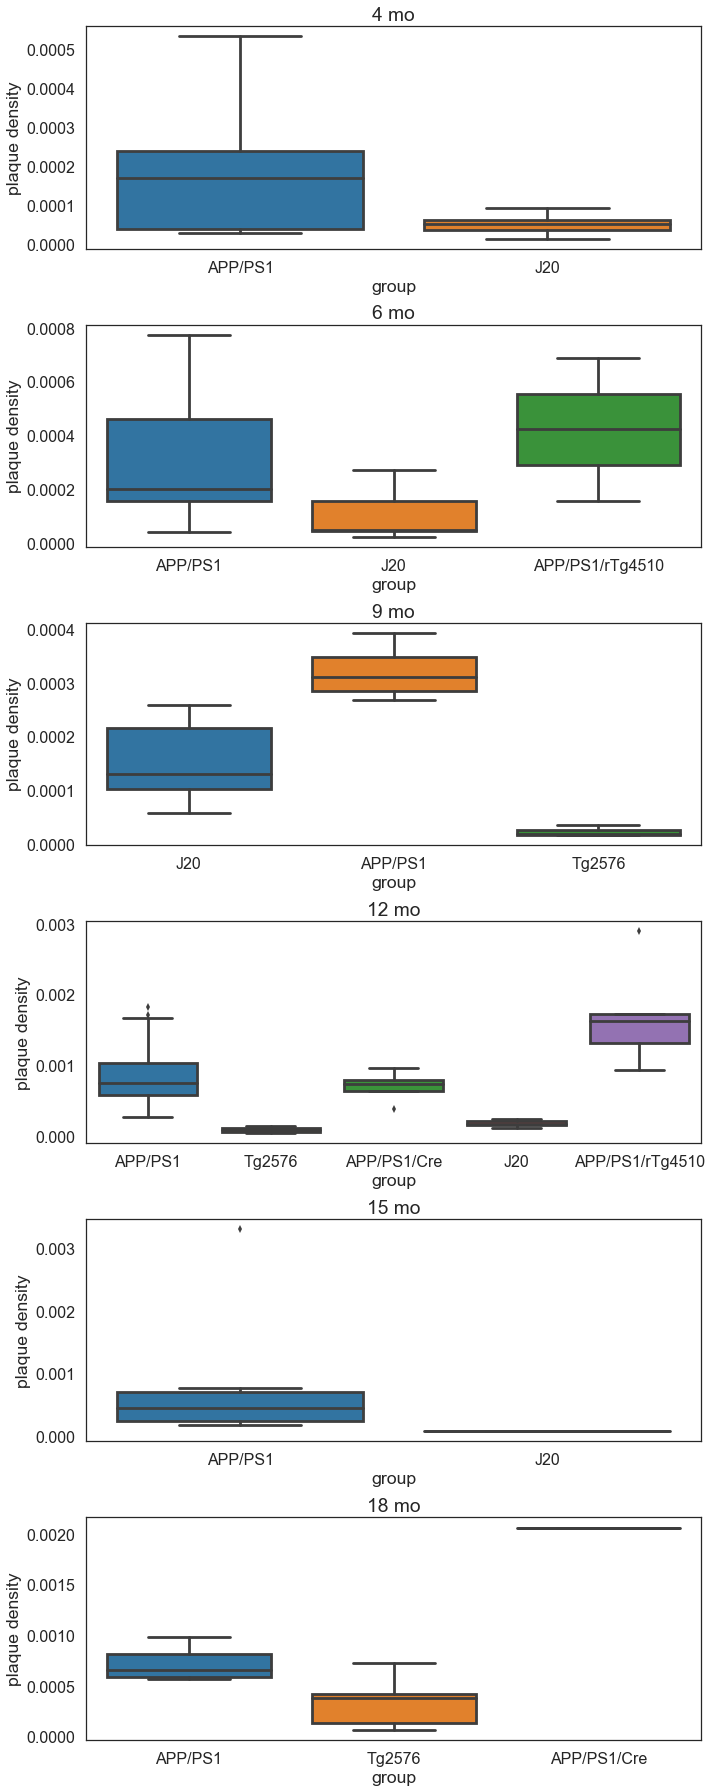

In [70]:
fig, ax = plt.subplots(6, figsize = (10, 25))
for ix in range(6):
    age = mdf['age'].unique()[ix]
    g = sns.boxplot('group', 'plaque density', data = mdf[mdf['age'] == age], ax=ax[ix])
    g.set_title(age)
    plt.tight_layout()
#plt.savefig(os.path.join(p

In [72]:
def get_mean_value_per_structure(group, age, structure_ids):
    means = []
    isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
    for structure_id in structure_ids:
        means.append(np.mean(dat[(dat['structure_id'] == structure_id) & 
                                 (dat['image_series_id'].isin(isids))]
                             ['plaque_density']))
    structuredat = dict(zip(structure_ids, means))
    return structuredat

## Generate dictionary of plaque density per structure

In [73]:
structure_vals = get_mean_value_per_structure('APP/PS1', '12 mo', structures)

In [74]:
structure_vals[315]

0.012912025100000002

(528, 320, 456)
[0 1]


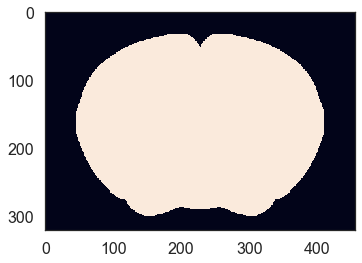

In [75]:
mask, _ = mcc.get_structure_mask(997)
print(mask.shape)
plt.imshow(mask[200])
print(np.unique(mask))

In [76]:
coarse_structure_ids

[315, 698, 1089, 703, 477, 803, 549, 1097, 313, 771, 354, 512]

[0.         0.0002243  0.00030249 0.00032002 0.00044023 0.00054086
 0.00105286 0.00165017 0.00355401 0.00734655 0.00827099 0.00937042
 0.01291203]


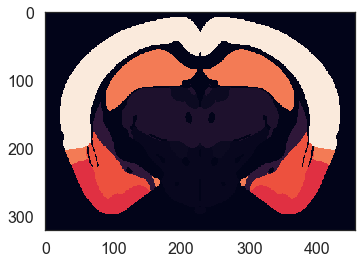

In [77]:
mask, _ = mcc.get_structure_mask(997)
newmask = np.zeros(mask.shape)
for structure in coarse_structure_ids:
    structure_mask, _ = mcc.get_structure_mask(structure)
    newval = structure_vals[structure]
    newmask[np.where(structure_mask)] = newval
print(np.unique(newmask))
plt.imshow(newmask[300])

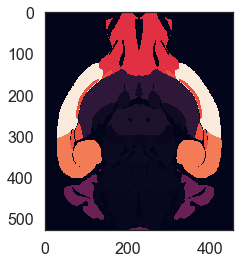

In [78]:
plt.imshow(newmask[:,200,:])

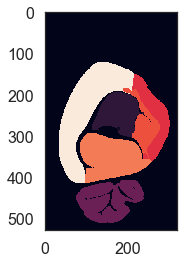

In [79]:
plt.imshow(newmask[:,:,100])

In [80]:
newmask.shape

(528, 320, 456)

In [81]:
np.unique(newmask)

array([0.        , 0.0002243 , 0.00030249, 0.00032002, 0.00044023,
       0.00054086, 0.00105286, 0.00165017, 0.00355401, 0.00734655,
       0.00827099, 0.00937042, 0.01291203])

[  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  20  21  23  24  25  26  29  30  31  33  35  37  38  39  40  42  43  45
  48  49  50  52  55  56  57  62  68  73  74  81  83  90  92  93  94  96
  98  99 101 104 109 110 114 118 121 122 124 125 126 128 129 130 131 134
 135 137 139 142 143 144 145 146 148 153 156 157 158 162 166 169 176 185
 189 193 202 206]


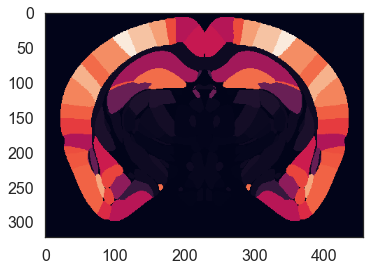

In [133]:
# This takes forever to run
mask, _ = mcc.get_structure_mask(997)
newmask = np.zeros_like(mask)
for structure in summary_structure_ids:
    structure_mask, _ = mcc.get_structure_mask(structure)
    newval = structure_vals[structure]*10000
    newmask[np.where(structure_mask)] = newval
print(np.unique(newmask))
plt.imshow(newmask[300])

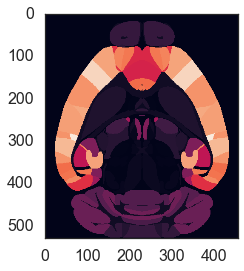

In [134]:
plt.imshow(newmask[:,125,:])

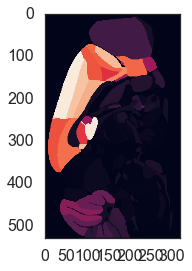

In [135]:
plt.imshow(newmask[:,:,250])

In [82]:
all_structure_vals = get_mean_value_per_structure('Tg2576', '12 mo', dat.structure_id.unique())

In [83]:
from matplotlib import cm
structure_rgb_vals = all_structure_vals.copy()
for key in structure_rgb_vals:
    structure_rgb_vals[key] = tuple([255*i for i in cm.inferno(all_structure_vals[key]*50)[:3]])
structure_rgb_vals[0] = [0.0, 0.0, 0.0]

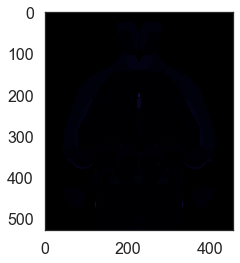

In [84]:
reference_space =  mcc.get_reference_space()
slice_image = reference_space.get_slice_image(1, 6000, structure_rgb_vals) # this method wants an axis and a position in microns
plt.imshow(slice_image)

[None, None, None, None, None, None, None, None, None, None, None, None]

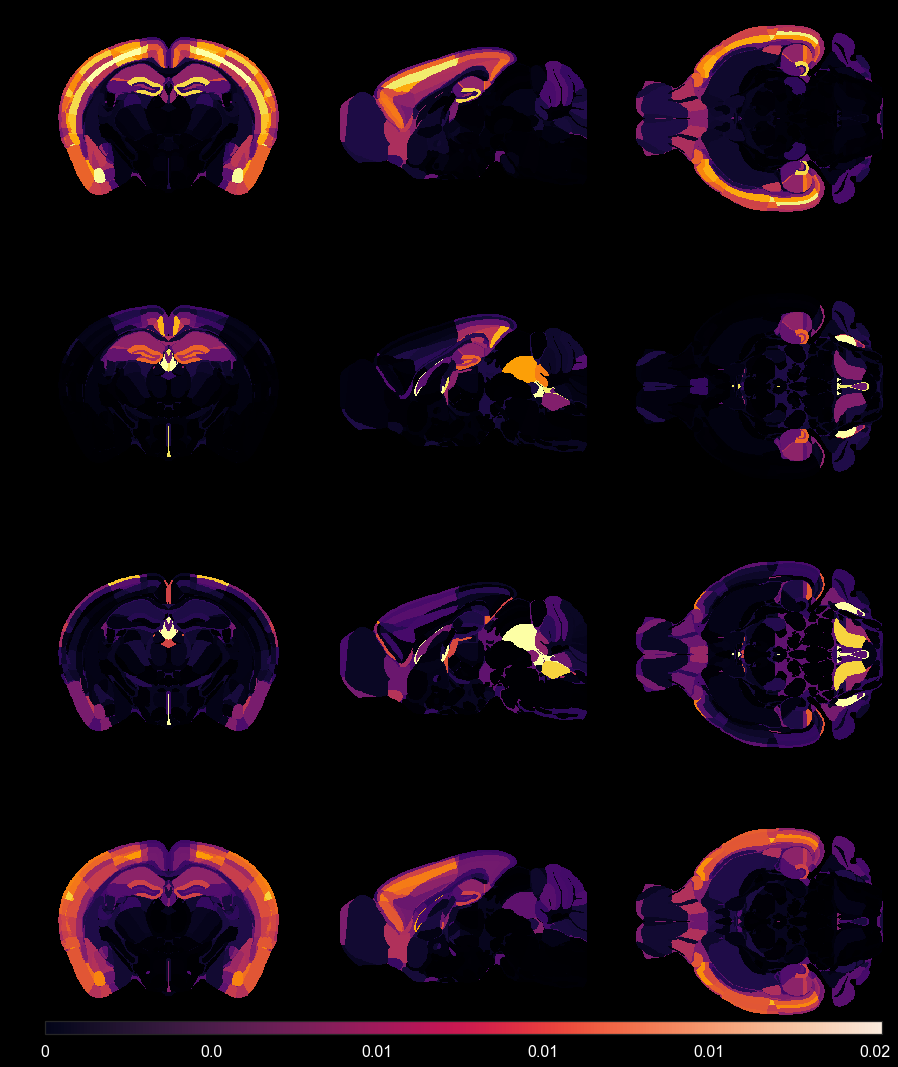

In [87]:
app_ps1_structure_vals = get_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())
app_ps1_rgb_vals = app_ps1_structure_vals.copy()
for key in app_ps1_structure_vals:
    app_ps1_rgb_vals[key] = tuple([256*i for i in cm.inferno(app_ps1_structure_vals[key]*50)[:3]])
app_ps1_rgb_vals[0] = [0, 0, 0]

w=10
h=10
image = [0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]
image[0] = reference_space.get_slice_image(0, index[0], app_ps1_rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], app_ps1_rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], app_ps1_rgb_vals))  
fig = plt.figure(figsize=(15, 15), facecolor='k')
columns = 3
rows = 4
for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')

j20_structure_vals = get_mean_value_per_structure('J20', '12 mo', dat.structure_id.unique())
j20_rgb_vals = j20_structure_vals.copy()
for key in j20_structure_vals:
    j20_rgb_vals[key] = tuple([256*i for i in cm.inferno(j20_structure_vals[key]*350)[:3]])
j20_rgb_vals[0] = [0, 0, 0]

image[3] = reference_space.get_slice_image(0, index[0], j20_rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], j20_rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], j20_rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
    
tg2576_structure_vals = get_mean_value_per_structure('Tg2576', '12 mo', dat.structure_id.unique())
tg2576_rgb_vals = tg2576_structure_vals.copy()
for key in tg2576_structure_vals:
    tg2576_rgb_vals[key] = tuple([256*i for i in cm.inferno(tg2576_structure_vals[key]*750)[:3]])
tg2576_rgb_vals[0] = [0, 0, 0]

image[6] = reference_space.get_slice_image(0, index[0], tg2576_rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], tg2576_rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], tg2576_rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
    
rTg4510_structure_vals = get_mean_value_per_structure('APP/PS1/rTg4510', '12 mo', dat.structure_id.unique())
rTg4510_rgb_vals = rTg4510_structure_vals.copy()
for key in rTg4510_structure_vals:
    rTg4510_rgb_vals[key] = tuple([256*i for i in cm.inferno(rTg4510_structure_vals[key]*50)[:3]])
rTg4510_rgb_vals[0] = [0, 0, 0]

image[9] = reference_space.get_slice_image(0, index[0], rTg4510_rgb_vals)
image[10] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rTg4510_rgb_vals)), 0)
image[11] = np.rot90(reference_space.get_slice_image(1, index[1], rTg4510_rgb_vals)) 

for i in range(columns+9):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
    
fig.subplots_adjust(top=1, bottom=0.05)
cbar_ax = fig.add_subplot(70, 1, 70)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
maxval = max(app_ps1_structure_vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
#plt.show()

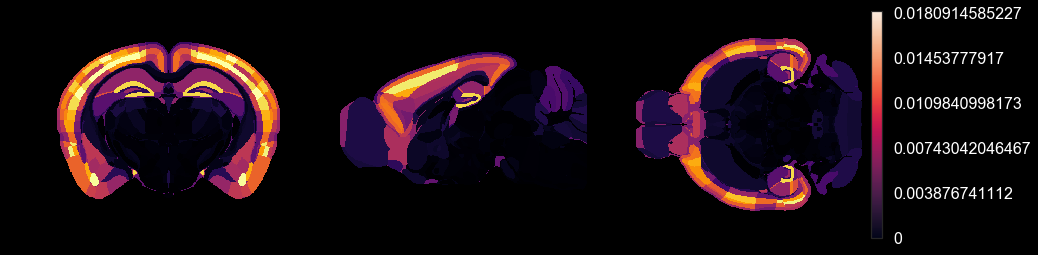

In [88]:
structure_vals = get_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())
rgb_vals = structure_vals.copy()
for key in structure_vals:
    rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key]*50)[:3]])
rgb_vals[0] = [0, 0, 0]

w=10
h=10
image = [0,0,0]
index = [7500, 4500, 5000]
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  
fig = plt.figure(figsize=(15, 15), facecolor='k')
columns = 3
rows = 1
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
cbar = fig.colorbar(f, fraction=0.046, pad=0.04)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='w')

maxval = max(app_ps1_structure_vals.iteritems(), key=operator.itemgetter(1))[1]
cbar.ax.set_yticklabels([0, maxval*.12, maxval*.23, maxval*.34, maxval*.45, maxval*.56, maxval*.67,
                        maxval*.78, maxval*.89, maxval])
plt.show()

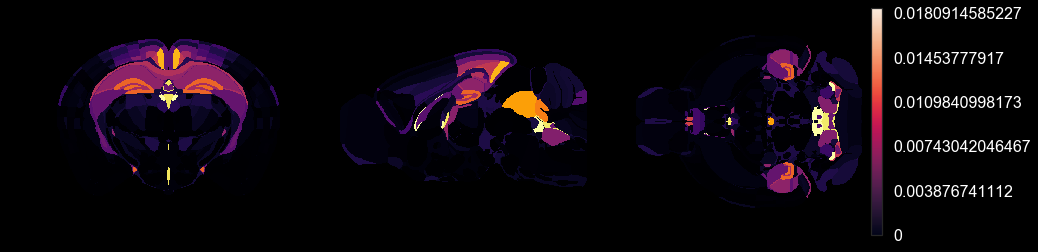

In [89]:
structure_vals = get_mean_value_per_structure('J20', '12 mo', dat.structure_id.unique())
rgb_vals = structure_vals.copy()
for key in structure_vals:
    rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key]*350)[:3]])
rgb_vals[0] = [0, 0, 0]

w=10
h=10
image = [0,0,0]
index = [7500, 4500, 5000]
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  
fig = plt.figure(figsize=(15, 15), facecolor='k')
columns = 3
rows = 1
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
cbar = fig.colorbar(f, fraction=0.046, pad=0.04)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='w')

maxval = max(app_ps1_structure_vals.iteritems(), key=operator.itemgetter(1))[1]
cbar.ax.set_yticklabels([0, maxval*.12, maxval*.23, maxval*.34, maxval*.45, maxval*.56, maxval*.67,
                        maxval*.78, maxval*.89, maxval])
plt.show()

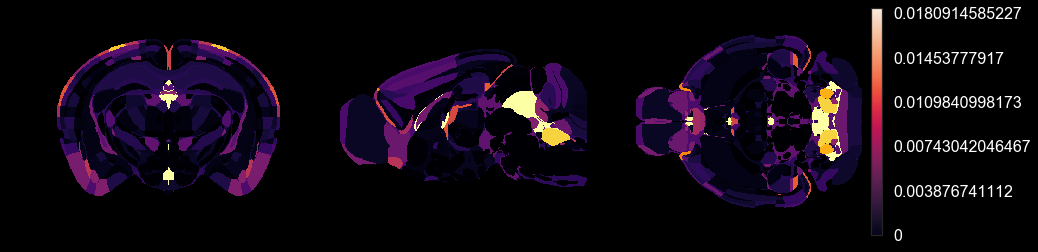

In [90]:
structure_vals = get_mean_value_per_structure('Tg2576', '12 mo', dat.structure_id.unique())
rgb_vals = structure_vals.copy()
for key in structure_vals:
    rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key]*750)[:3]])
rgb_vals[0] = [0, 0, 0]

w=10
h=10
image = [0,0,0]
index = [7500, 4500, 5000]
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  
fig = plt.figure(figsize=(15, 15), facecolor='k')
columns = 3
rows = 1
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
cbar = fig.colorbar(f, fraction=0.046, pad=0.04)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='w')

maxval = max(app_ps1_structure_vals.iteritems(), key=operator.itemgetter(1))[1]
cbar.ax.set_yticklabels([0, maxval*.12, maxval*.23, maxval*.34, maxval*.45, maxval*.56, maxval*.67,
                        maxval*.78, maxval*.89, maxval])
plt.show()

In [93]:
def get_relative_mean_value_per_structure(group, age, structure_ids):
    means = []
    isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
    for structure_id in structure_ids:
        str_mean = np.mean(dat[(dat['structure_id'] == structure_id) & 
                                 (dat['image_series_id'].isin(isids))]
                             ['plaque_density'])
        root_mean = np.mean(dat[(dat['structure_id'] == 993) & 
                                 (dat['image_series_id'].isin(isids))]
                             ['plaque_density'])
        means.append(str_mean/root_mean)
    structuredat = dict(zip(structure_ids, means))
    return structuredat, len(isids)

def get_mean_value_per_structure(group, age, structure_ids):
    means = []
    isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
    for structure_id in structure_ids:
        str_mean = np.mean(dat[(dat['structure_id'] == structure_id) & 
                                 (dat['image_series_id'].isin(isids))]
                             ['plaque_density'])
        means.append(str_mean)
    structuredat = dict(zip(structure_ids, means))
    return structuredat, len(isids)

def get_cmap(group, age, scale=50):
    structure_vals, n = get_mean_value_per_structure(group, age, dat.structure_id.unique())
    rgb_vals = structure_vals.copy()
    for key in structure_vals:
        rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key]*scale)[:3]])
    rgb_vals[0] = (0, 0, 0)
    return rgb_vals, n

def get_log_cmap(group, age):
    structure_vals, n = get_mean_value_per_structure(group, age, dat.structure_id.unique())
    offset = -np.min([np.log10(value+0.0000005) for value in structure_vals.values()])
    print(offset)
    scaled_values = [(value+offset)*256 for value in structure_vals.values()]
    rgb_vals = dict(zip(structure_vals.keys(), scaled_values))
    for key in rgb_vals:
        rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key])[:3]])
    rgb_vals[0] = (0, 0, 0)
    return rgb_vals, n

# Need to figure out how to convert to lognorm color scale
maxval = max(means)
    minval = min(means)
normvals = [colors.LogNorm(color, minval, maxval) for color in means]
    print(normvals)

In [94]:
test, _ = get_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())

In [95]:
logvals = [np.log10(value+0.000005) for value in test.values()]

In [96]:
logvals

[-4.080380032888393,
 -2.511228239688914,
 -3.3889433800370994,
 -4.388802634073478,
 -3.8281617593949675,
 -2.2171164214977876,
 -1.7624399803080497,
 -3.9160714045164684,
 -3.8787357166696443,
 -2.9935602441306415,
 -3.5142781884252265,
 -1.8950845244262164,
 -1.996009603000642,
 -3.0118423489233037,
 -1.754865842427361,
 -3.0229073432570583,
 -3.896520837063198,
 -3.2352573222946495,
 -2.156437646650399,
 -4.099441911638853,
 -1.9379027043430133,
 -1.825141712431636,
 -4.40941153113542,
 -2.1551535513935516,
 -3.5381606403055823,
 -1.924262365583618,
 -1.9029047981473188,
 -4.19372696127469,
 -2.1173813371617602,
 -4.074858950701669,
 -1.9562882666891057,
 -3.4707485603017383,
 -3.595284704613894,
 -1.7162005790721238,
 -4.324964894071163,
 -2.8594582077468806,
 -3.9822639259052934,
 -3.7180916893783595,
 -4.668847332010674,
 -3.1942430012263516,
 -2.1749180655007723,
 -5.273107850148568,
 -4.262314297053119,
 -2.4046529115492405,
 -3.3394605327123736,
 -2.9027572572946516,
 -1.7921

In [97]:
np.min(logvals)

-5.301029995663981

6.301029995663981


Text(0.5,1,u'relative plaque density')

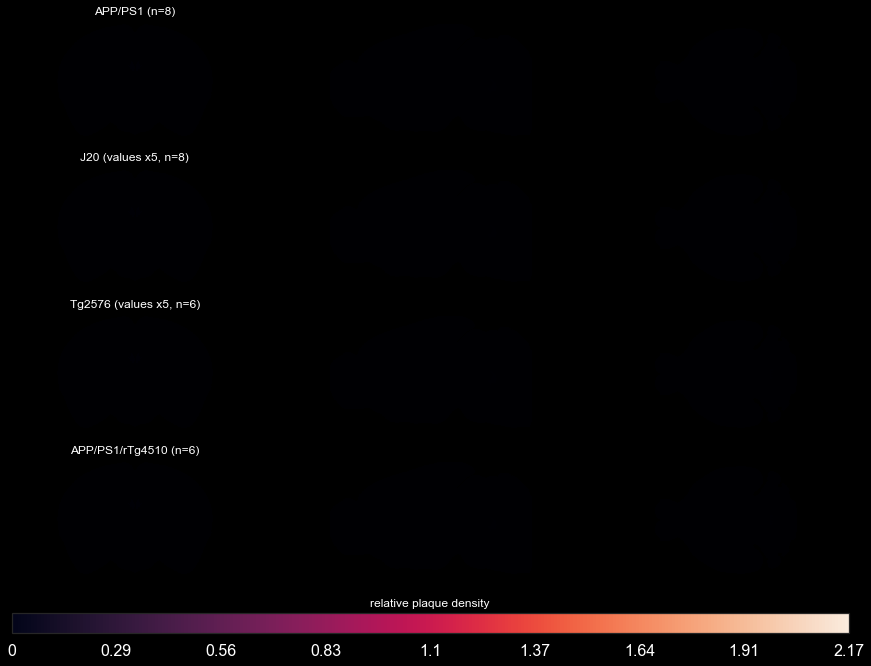

In [98]:
fig = plt.figure(figsize=(15, 13), facecolor='k')
columns = 3
rows = 5
image = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]

rgb_vals, n = get_log_cmap('J20', '12 mo')
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  

for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[0].set_title('APP/PS1 (n={0})'.format(n), size='large', color='w')

_, n = get_cmap('J20', '12 mo')
image[3] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[3].set_title('J20 (values x5, n={0})'.format(n), size='large', color='w')

_, n = get_cmap('Tg2576', '12 mo')
image[6] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[6].set_title('Tg2576 (values x5, n={0})'.format(n), size='large', color='w')
    
_, n = get_cmap('APP/PS1/rTg4510', '12 mo')
image[9] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[10] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[11] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+9):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[9].set_title('APP/PS1/rTg4510 (n={0})'.format(n), size='large', color='w')
    
#fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_subplot(30, 1, 26)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
vals, _ = get_relative_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())
maxval = max(vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
plt.gcf().axes[12].set_title('relative plaque density', size='large', color='w')
#plt.savefig(os.path.join(path, 'plaque maps 12 mo.pdf'), facecolor=fig.get_facecolor(),
#            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

Text(0.5,1,u'relative plaque density')

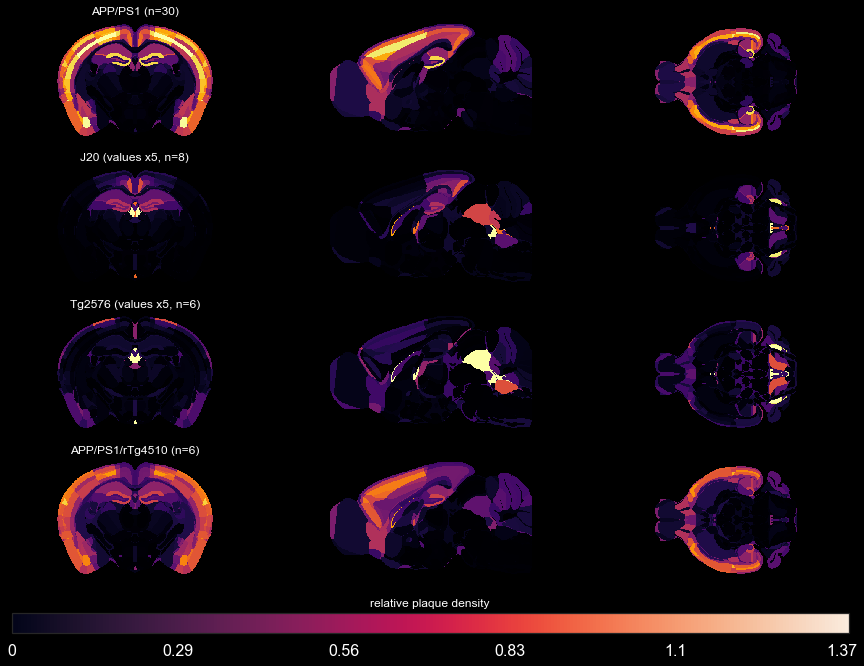

In [99]:
fig = plt.figure(figsize=(15, 13), facecolor='k')
columns = 3
rows = 5
image = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]

app_ps1_rgb_vals, n = get_cmap('APP/PS1', '12 mo')
image[0] = reference_space.get_slice_image(0, index[0], app_ps1_rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], app_ps1_rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], app_ps1_rgb_vals))  

for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[0].set_title('APP/PS1 (n={0})'.format(n), size='large', color='w')

j20_rgb_vals, n = get_cmap('J20', '12 mo', 250)
image[3] = reference_space.get_slice_image(0, index[0], j20_rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], j20_rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], j20_rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[3].set_title('J20 (values x5, n={0})'.format(n), size='large', color='w')

tg2576_rgb_vals, n = get_cmap('Tg2576', '12 mo', 500)
image[6] = reference_space.get_slice_image(0, index[0], tg2576_rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], tg2576_rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], tg2576_rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[6].set_title('Tg2576 (values x5, n={0})'.format(n), size='large', color='w')
    
rTg4510_rgb_vals, n = get_cmap('APP/PS1/rTg4510', '12 mo')
image[9] = reference_space.get_slice_image(0, index[0], rTg4510_rgb_vals)
image[10] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rTg4510_rgb_vals)), 0)
image[11] = np.rot90(reference_space.get_slice_image(1, index[1], rTg4510_rgb_vals)) 

for i in range(columns+9):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[9].set_title('APP/PS1/rTg4510 (n={0})'.format(n), size='large', color='w')
    
#fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_subplot(30, 1, 26)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
vals, _ = get_relative_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())
maxval = max(vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
plt.gcf().axes[12].set_title('relative plaque density', size='large', color='w')
#plt.savefig(os.path.join(path, 'plaque maps 12 mo.pdf'), facecolor=fig.get_facecolor(),
#            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

In [102]:
def get_mean_value_per_structure(group, age, structure_ids):
    means = []
    isids = dataset[(dataset['Mouse Line'] == group) & (dataset['Dataset'] == age)]['image_series_id'].values
    for structure_id in structure_ids:
        means.append(np.mean(dat[(dat['structure_id'] == structure_id) & 
                                 (dat['image_series_id'].isin(isids))]
                             ['plaque_density']))
    structuredat = dict(zip(structure_ids, means))
    return structuredat, len(isids)

def get_cmap(group, age, scale=100):
    structure_vals, n = get_mean_value_per_structure(group, age, dat.structure_id.unique())
    rgb_vals = structure_vals.copy()
    for key in structure_vals:
        rgb_vals[key] = tuple([256*i for i in cm.inferno(structure_vals[key]*scale)[:3]])
        rgb_vals[0] = (0, 0, 0)
    return rgb_vals, n

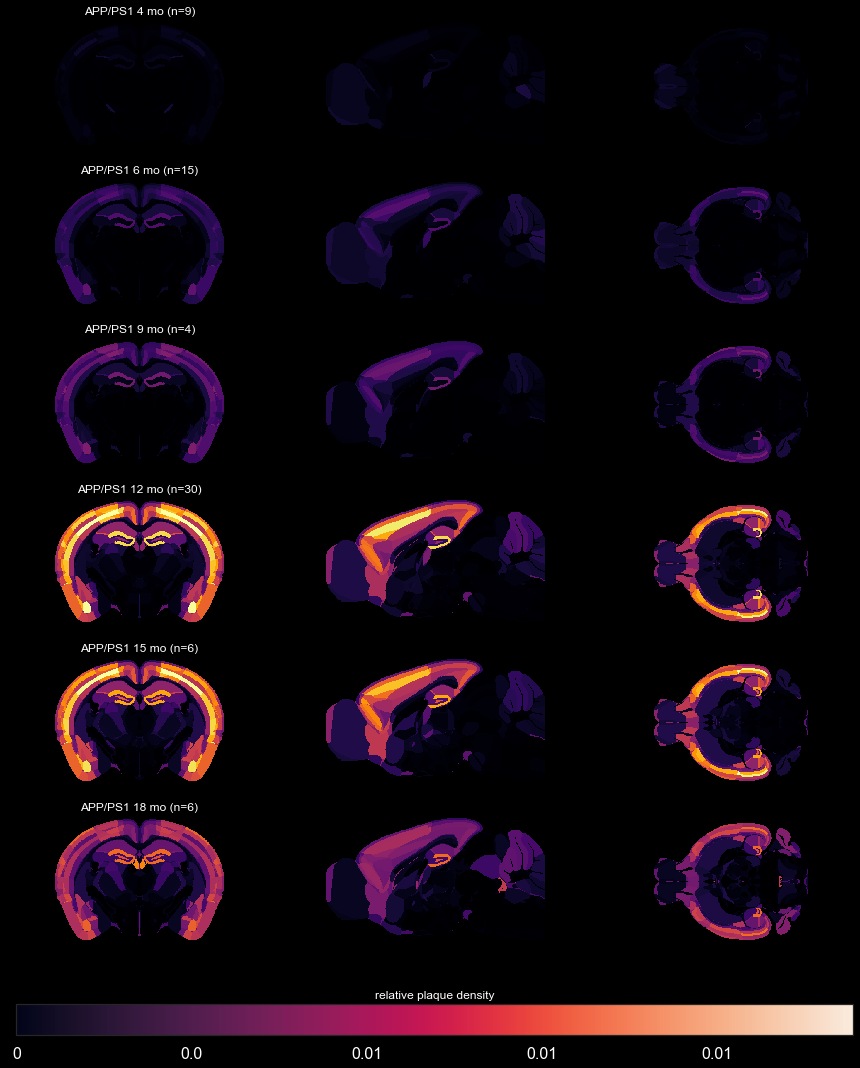

In [103]:
fig = plt.figure(figsize=(15, 20), facecolor='k')
columns = 3
rows = 7
image = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]
scale=50

rgb_vals, n = get_cmap('APP/PS1', '4 mo', scale=scale)
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  

for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[0].set_title('APP/PS1 4 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('APP/PS1', '6 mo', scale=scale)
image[3] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[3].set_title('APP/PS1 6 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('APP/PS1', '9 mo', scale=scale)
image[6] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[6].set_title('APP/PS1 9 mo (n={0})'.format(n), size='large', color='w')
    
rgb_vals, n = get_cmap('APP/PS1', '12 mo', scale=scale)
image[9] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[10] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[11] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+9):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[9].set_title('APP/PS1 12 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('APP/PS1', '15 mo', scale=scale)
image[12] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[13] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[14] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+12):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[12].set_title('APP/PS1 15 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('APP/PS1', '18 mo', scale=scale)
image[15] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[16] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[17] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+15):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[15].set_title('APP/PS1 18 mo (n={0})'.format(n), size='large', color='w')
    
#fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_subplot(30, 1, 28)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
vals, _ = get_mean_value_per_structure('APP/PS1', '12 mo', dat.structure_id.unique())
maxval = max(vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
plt.gcf().axes[18].set_title('relative plaque density', size='large', color='w')
plt.savefig(os.path.join(path, 'plaque maps APP_PS1 by age.pdf'), facecolor=fig.get_facecolor(),
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

C:\Users\jenniferwh\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


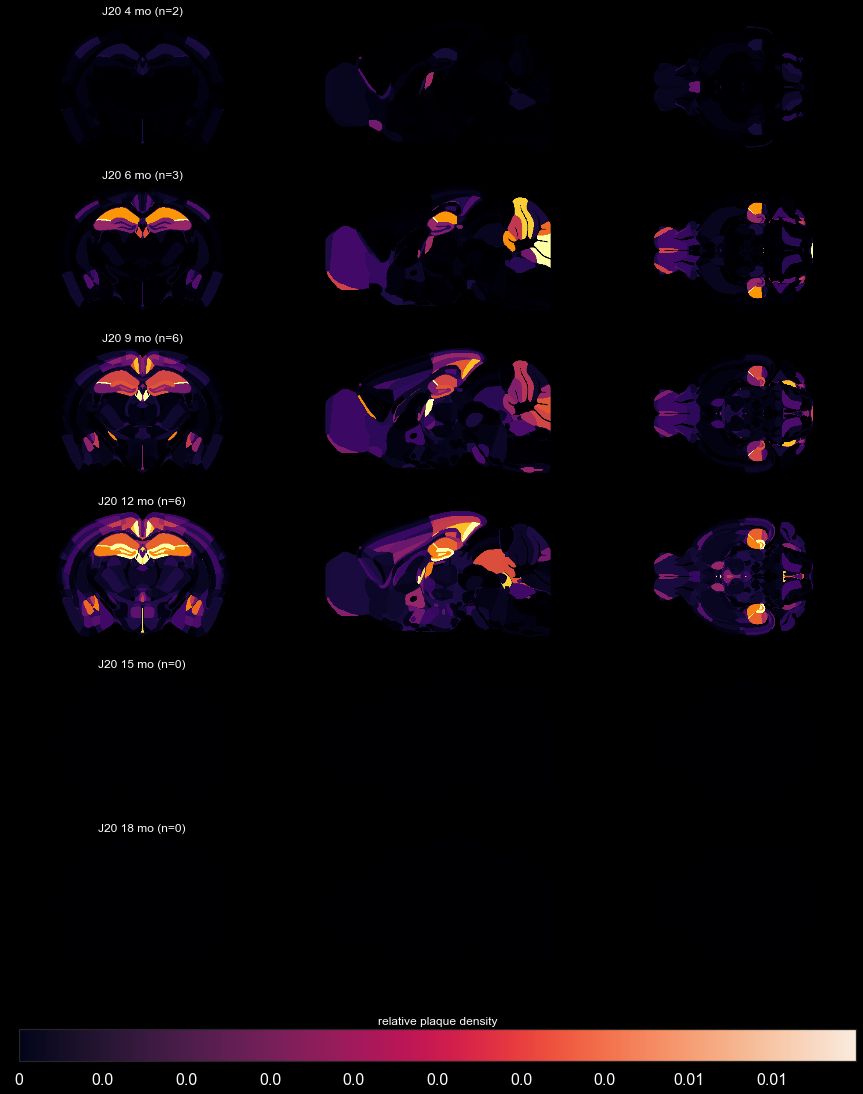

In [180]:
fig = plt.figure(figsize=(15, 20), facecolor='k')
columns = 3
rows = 7
image = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]
scale = 350

rgb_vals, n = get_cmap('J20', '4 mo', scale=scale)
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals))  

for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[0].set_title('J20 4 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('J20', '6 mo', scale=scale)
image[3] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[3].set_title('J20 6 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('J20', '9 mo', scale=scale)
image[6] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[6].set_title('J20 9 mo (n={0})'.format(n), size='large', color='w')
    
rgb_vals, n = get_cmap('J20', '12 mo', scale=scale)
image[9] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[10] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[11] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+9):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[9].set_title('J20 12 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('J20', '15 mo', scale=scale)
image[12] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[13] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[14] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+12):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[12].set_title('J20 15 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('J20', '18 mo', scale=scale)
image[15] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[16] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[17] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+15):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[15].set_title('J20 18 mo (n={0})'.format(n), size='large', color='w')
    
#fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_subplot(30, 1, 28)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
vals, _ = get_mean_value_per_structure('J20', '12 mo', dat.structure_id.unique())
maxval = max(vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
plt.gcf().axes[18].set_title('relative plaque density', size='large', color='w')
plt.savefig(os.path.join(path, 'plaque maps J20 by age.pdf'), facecolor=fig.get_facecolor(),
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)

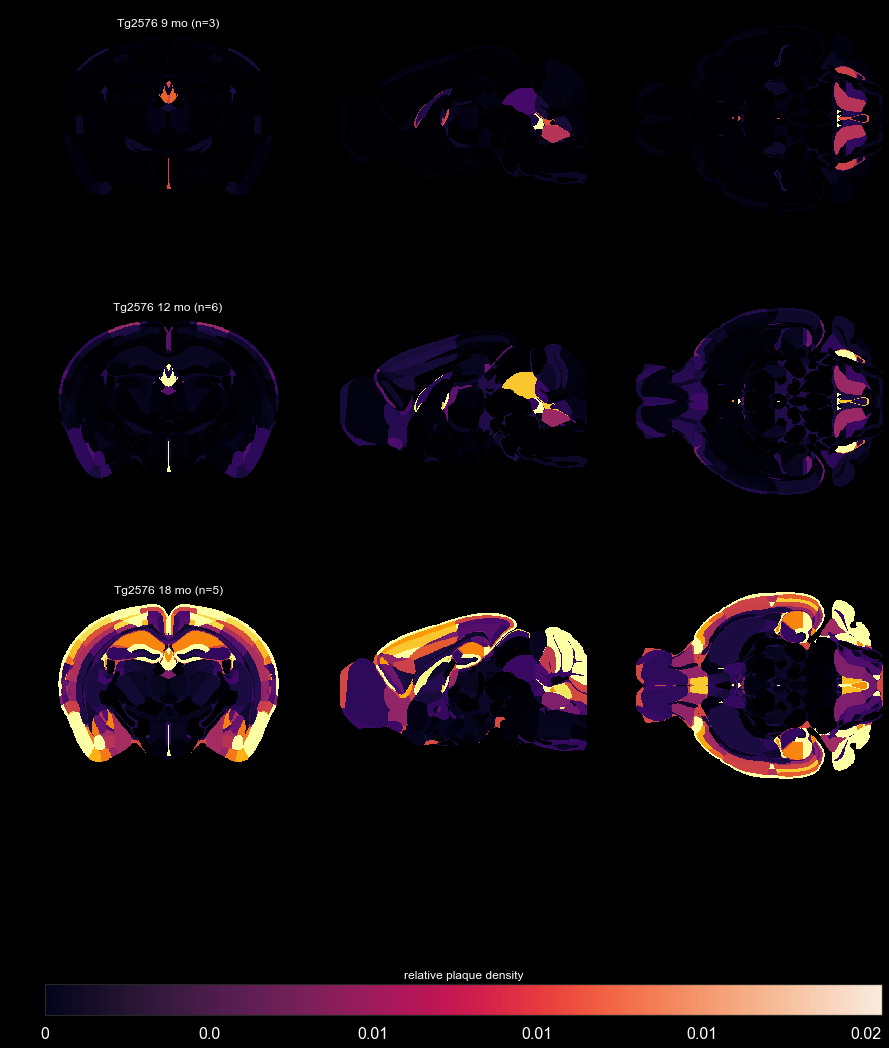

In [104]:
fig = plt.figure(figsize=(15, 20), facecolor='k')
columns = 3
rows = 4
image = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
index = [7000, 5000, 5000]
scale = 350

rgb_vals, n = get_cmap('Tg2576', '9 mo', scale=scale)
image[0] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[1] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[2] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[0].set_title('Tg2576 9 mo (n={0})'.format(n), size='large', color='w')
    
rgb_vals, n = get_cmap('Tg2576', '12 mo', scale=scale)
image[3] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[4] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[5] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+3):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[3].set_title('Tg2576 12 mo (n={0})'.format(n), size='large', color='w')

rgb_vals, n = get_cmap('Tg2576', '18 mo', scale=scale)
image[6] = reference_space.get_slice_image(0, index[0], rgb_vals)
image[7] = np.flip(np.rot90(reference_space.get_slice_image(2, index[2], rgb_vals)), 0)
image[8] = np.rot90(reference_space.get_slice_image(1, index[1], rgb_vals)) 

for i in range(columns+6):
    fig.add_subplot(rows, columns, i+1)
    f = plt.imshow(image[i])
    plt.axis('off')
plt.gcf().axes[6].set_title('Tg2576 18 mo (n={0})'.format(n), size='large', color='w')
    
#fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_subplot(30, 1, 28)
cbar = fig.colorbar(f, cax=cbar_ax, orientation='horizontal')
vals, _ = get_mean_value_per_structure('Tg2576', '18 mo', dat.structure_id.unique())
maxval = max(vals.iteritems(), key=operator.itemgetter(1))[1]
cbar_ax.set_xticklabels([0, np.round(maxval*.12, 2), np.round(maxval*.23, 2), np.round(maxval*.34, 2), 
                         np.round(maxval*.45, 2), np.round(maxval*.56, 2), np.round(maxval*.67, 2),
                        np.round(maxval*.78, 2), np.round(maxval*.89, 2), np.round(maxval, 2)])
plt.setp(plt.getp(cbar_ax, 'xticklabels'), color='w')
plt.gcf().axes[9].set_title('relative plaque density', size='large', color='w')
plt.savefig(os.path.join(path, 'plaque maps Tg2576 by age.pdf'), facecolor=fig.get_facecolor(),
            bbox_inches='tight', pad_inches=0.3, format='pdf', transparent = True, dpi=1000)